# PetFinder Feature Engineering -Mahmood

In [4]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv('/kaggle/input/petfinder-adoption-prediction/train/train.csv')
test_df = pd.read_csv('/kaggle/input/petfinder-adoption-prediction/test/test.csv')
color_df = pd.read_csv('/kaggle/input/petfinder-adoption-prediction/ColorLabels.csv')
breed_df = pd.read_csv('/kaggle/input/petfinder-adoption-prediction/BreedLabels.csv')

In [5]:
train_df.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2

In [6]:
# basic features : if its a mix of both breed, it will be 2 else 1.
train_df['num_breed'] = ((train_df['Breed1'] > 0) & (train_df['Breed2'] > 0)).astype(int) + ((train_df['Breed1'] > 0) | (train_df['Breed2'] > 0)).astype(int)
test_df['num_breed'] = ((test_df['Breed1'] > 0) & (test_df['Breed2'] > 0)).astype(int) + ((test_df['Breed1'] > 0) | (test_df['Breed2'] > 0)).astype(int)


In [8]:
# same with number of colors 
color_columns = ['Color1', 'Color2', 'Color3']
train_df['num_colors'] = (train_df[color_columns] > 0).sum(axis=1)
test_df['num_colors'] = (test_df[color_columns] > 0).sum(axis=1)


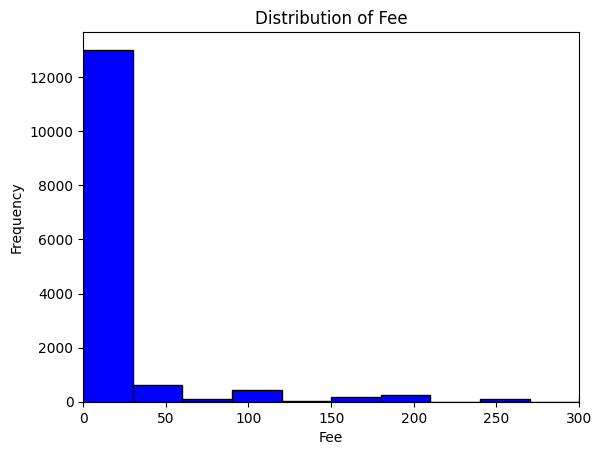

In [16]:
# lets do something with fee 
import matplotlib.pyplot as plt
# distribution of fee
plt.hist(train_df['Fee'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Fee')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.xlim(0,300)
plt.show()


In [17]:
# using vaccinated, dewormed, health and sterilized features
train_df['Total_Vaccinations'] = train_df[['Vaccinated', 'Dewormed', 'Sterilized']].sum(axis=1)
test_df['Total_Vaccinations'] = test_df[['Vaccinated', 'Dewormed', 'Sterilized']].sum(axis=1)

train_df['Avg_Health_Score'] = train_df[['Health']].mean(axis=1)
test_df['Avg_Health_Score'] = test_df[['Health']].mean(axis=1)

In [19]:
# feature using fur length and health

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# creating interaction feature
train_df['Fur_Health_Interact'] = train_df['FurLength'].astype(str) + '_' + train_df['Health'].astype(str)
# Fit and transform the column
train_df['Fur_Health_Interact_Encoded'] = label_encoder.fit_transform(train_df['Fur_Health_Interact'])

test_df['Fur_Health_Interact'] = test_df['FurLength'].astype(str) + '_' + test_df['Health'].astype(str)
# Fit and transform the column
test_df['Fur_Health_Interact_Encoded'] = label_encoder.fit_transform(test_df['Fur_Health_Interact'])

In [21]:
# feature using health
def feature_eng_health_vaccinated(df):

    conditions = [
        (df['Health'] == 1) & (df['Total_Vaccinations'] == 0),
        (df['Health'] == 1) & (df['Total_Vaccinations'] > 0),
        (df['Health'].isin([2, 3]))
    ]
    choices = ['Healthy and Unvaccinated', 'Healthy and Vaccinated', 'Injured or Sick']
    df['Overall_Health_Status'] = np.select(conditions, choices, default='Not Specified')
    df['Overall_Health_Status_Encoded'] = label_encoder.fit_transform(df['Overall_Health_Status'])
    
    return df

train_df = feature_eng_health_vaccinated(train_df)
test_df = feature_eng_health_vaccinated(test_df)


In [24]:
# arranging the column order
new_column_order = ['PetID'] + [col for col in train_df.columns if col != 'PetID' and col != 'AdoptionSpeed'] + ['AdoptionSpeed']
train_df_new_order = train_df[new_column_order]


In [31]:
if 'AdoptionSpeed' in test_df.columns:
    new_column_order = ['PetID'] + [col for col in test_df.columns if col != 'PetID' and col != 'AdoptionSpeed'] + ['AdoptionSpeed']
    test_df = test_df[new_column_order]
else:
    new_column_order = ['PetID'] + [col for col in test_df.columns if col != 'PetID']
    test_df = test_df[new_column_order]

In [33]:
test_df.shape

(3972, 31)

In [36]:
# saving the files
train_df_new_order.to_csv('train_df_mahmood_features.csv')
test_df.to_csv('test_df_mahmood_features.csv')

# **Sentiment Analysis**

In [39]:
import pandas as pd 

In [40]:
file_path = r"C:\python\dataset\petfinder\fulldata\train\train.csv" # Assuming the file is named 'train.csv'

In [41]:
file_path_test = r"C:\python\dataset\petfinder\fulldata\test\test.csv" # Assuming the file is named 'train.csv'

In [42]:
data = pd.read_csv(file_path)

In [43]:
data.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [44]:
data_test = pd.read_csv(file_path_test)

In [45]:
data_test.head()

Type                       Name  Age  Breed1  Breed2  Gender  Color1  \
0     2               Dopey & Grey    8     266     266       1       2   
1     2                    Chi Chi   36     285     264       2       1   
2     2                     Sticky    2     265       0       1       6   
3     1  Dannie & Kass [In Penang]   12     307       0       2       2   
4     2                    Cuddles   12     265       0       1       2   

   Color2  Color3  MaturitySize  ...  Sterilized  Health  Quantity  Fee  \
0       6       7             1  ...           2       1         2    0   
1       4       7             2  ...           1       2         1    0   
2       7       0             2  ...           2       1         1  200   
3       5       0             2  ...           1       1         2    0   
4       3       7             2  ...           1       1         1    0   

   State                         RescuerID  VideoAmt  \
0  41326  2ece3b2573dcdcebd774e635dca15fd9         0   
1  41326  2ece3b2573dcdcebd774e635dca15fd9         0   
2  41326  e59c106e9912fa30c898976278c2e834         0   
3  41326  e59c106e9912fa30c898976278c2e834         0   
4  41326  e59c106e9912fa30c898976278c2e834         0   

                                         Description      PetID  PhotoAmt  
0  Dopey Age: 8mths old Male One half of a pair, ...  e2dfc2935       2.0  
1  Please note that Chichi has been neutered, the...  f153b465f       1.0  
2  Sticky, named such because of his tendency to ...  3c90f3f54       4.0  
3  Dannie and Kass are mother and daughter. We en...  e02abc8a3       5.0  
4  Extremely cuddly cat, hence the origin of his ...  09f0df7d1       5.0  

[5 rows x 23 columns]

In [46]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [47]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ancar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
sia = SentimentIntensityAnalyzer()

In [49]:
data['Description'] = data['Description'].astype(str).fillna("No description")

In [50]:
data['Description'] = data['Description'].astype(str).fillna('')

In [51]:
data['sentiments'] = data['Description'].apply(lambda x: sia.polarity_scores(x))

In [52]:
data['compound'] = data['sentiments'].apply(lambda x: x['compound'])

In [53]:
print(data[['Description', 'compound']].head())

                                         Description  compound
0  Nibble is a 3+ month old ball of cuteness. He ...    0.9552
1  I just found it alone yesterday near my apartm...    0.1280
2  Their pregnant mother was dumped by her irresp...    0.7650
3  Good guard dog, very alert, active, obedience ...    0.9538
4  This handsome yet cute boy is up for adoption....    0.9880


In [54]:
data_test['Description'] = data_test['Description'].astype(str).fillna("No description")

In [55]:
data_test['Description'] = data_test['Description'].astype(str).fillna('')

In [56]:
data_test['sentiments'] = data_test['Description'].apply(lambda x: sia.polarity_scores(x))

In [57]:
data_test['compound'] = data_test['sentiments'].apply(lambda x: x['compound'])

In [58]:
print(data_test[['Description', 'compound']].head())

                                         Description  compound
0  Dopey Age: 8mths old Male One half of a pair, ...    0.9696
1  Please note that Chichi has been neutered, the...    0.9446
2  Sticky, named such because of his tendency to ...    0.9758
3  Dannie and Kass are mother and daughter. We en...    0.9792
4  Extremely cuddly cat, hence the origin of his ...    0.8809


In [59]:
train_file_path = r'C:\python\dataset\petfinder\fulldata\train\train.csv'
test_file_path = r'C:\python\dataset\petfinder\fulldata\test\test.csv' 

In [60]:
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [61]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
conda install -c conda-forge textblob

In [ ]:
from textblob import TextBlob

In [ ]:
train['polarity'] = train['Description'].astype(str).apply(get_polarity)
train['subjectivity'] = train['Description'].astype(str).apply(get_subjectivity)

test['polarity'] = test['Description'].astype(str).apply(get_polarity)
test['subjectivity'] = test['Description'].astype(str).apply(get_subjectivity)

In [36]:
print(train[['Description', 'polarity', 'subjectivity']].head())
print(test[['Description', 'polarity', 'subjectivity']].head())

                                         Description  polarity  subjectivity
0  Nibble is a 3+ month old ball of cuteness. He ...  0.130357      0.407143
1  I just found it alone yesterday near my apartm...  0.100000      0.400000
2  Their pregnant mother was dumped by her irresp...  0.261905      0.542857
3  Good guard dog, very alert, active, obedience ...  0.341146      0.437500
4  This handsome yet cute boy is up for adoption....  0.400000      0.743750
                                         Description  polarity  subjectivity
0  Dopey Age: 8mths old Male One half of a pair, ...  0.035937      0.230729
1  Please note that Chichi has been neutered, the...  0.054464      0.167445
2  Sticky, named such because of his tendency to ...  0.317857      0.678571
3  Dannie and Kass are mother and daughter. We en...  0.347865      0.603333
4  Extremely cuddly cat, hence the origin of his ...  0.142347      0.657143


## Extracting Image Features

We are extracting Texture Features and Local Features here. Below are some information about those features : 

Haralick Texture Features: These include energy, contrast, correlation, and entropy, which describe the texture of an image.

Local Features:SIFT (Scale-Invariant Feature Transform) and SURF (Speeded-Up Robust Features): Detect and describe distinctive local features in images.

In [49]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
import json
import cv2
import numpy as np
import skimage.feature as skf
import skimage.filters as skg
from skimage.measure import shannon_entropy
from scipy.stats import entropy
from sklearn.cluster import KMeans


### Extracting texture features 



In [ ]:
def extract_texture_features(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    haralick = skf.graycomatrix(img_gray, [1], [0], 256, symmetric=True, normed=True) 
    energy = skf.graycoprops(haralick, 'energy')[0, 0] 
    contrast = skf.graycoprops(haralick, 'contrast')[0, 0] 
    correlation = skf.graycoprops(haralick, 'correlation')[0, 0] 
    entropy = shannon_entropy(img_gray)

    mean = np.mean(img)
    std_dev = np.std(img)

    return energy, contrast, correlation, entropy, mean, std_dev



# looping through the training images
# Create an empty dataframe
df_train_img = pd.DataFrame(columns=['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean', 'Std_Dev'])

# Loop through each image in the folder
for filename in os.listdir(train_img_path):
    if filename.endswith('.jpg'):
        # Extract the texture features
        energy, contrast, correlation, entropy, mean, std_dev = extract_texture_features(os.path.join(train_img_path, filename))
        
        # Add the features to the dataframe
        df_train_img = pd.concat([df_train_img, pd.DataFrame({'PetID': [filename[:-4]], 'Energy': [energy], 'Contrast': [contrast], 'Correlation': [correlation], 'Entropy': [entropy], 'Mean': [mean], 'Std_Dev': [std_dev]})])
        
df_train_img.to_csv('df_train_img_texture.csv')

# looping through the testing images
# Create an empty dataframe
df_test_img = pd.DataFrame(columns=['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean', 'Std_Dev'])

# Loop through each image in the folder
for filename in os.listdir(test_img_path):
    if filename.endswith('.jpg'):
        # Extract the texture features
        energy, contrast, correlation, entropy, mean, std_dev = extract_texture_features(os.path.join(test_img_path, filename))
        
        # Add the features to the dataframe
        df_test_img = pd.concat([df_test_img, pd.DataFrame({'PetID': [filename[:-4]], 'Energy': [energy], 'Contrast': [contrast], 'Correlation': [correlation], 'Entropy': [entropy], 'Mean': [mean], 'Std_Dev': [std_dev]})])

df_test_img.to_csv('df_test_img_texture.csv')

### Extracting local features



In [ ]:
def extract_keypoints(file_path):
    # Load an image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect and compute SIFT keypoints and descriptors
    keypoints, _ = sift.detectAndCompute(image, None)

    # Return the number of keypoints
    return len(keypoints)


df_train_img['num_checkpoints'] = None  # Initialize the column

def extract_and_update(row):
    file_path = os.path.join(train_img_path, f"{row['PetID']}.jpg")
    num_keypoints = extract_keypoints(file_path)
    return num_keypoints


# Update the 'num_checkpoints' column
df_train_img['num_checkpoints'] = df_train_img.apply(extract_and_update, axis=1)
df_train_img.to_csv('train_img_keypoints.csv')

# Assuming df is your DataFrame
df_test_img['num_checkpoints'] = None  # Initialize the column

def extract_and_update(row):
    file_path = os.path.join(test_img_path, f"{row['PetID']}.jpg")
    num_keypoints = extract_keypoints(file_path)
    return num_keypoints


# Update the 'num_checkpoints' column
df_test_img['num_checkpoints'] = df_test_img.apply(extract_and_update, axis=1)
df_test_img.to_csv('test_img_keypoints.csv')


Combining the current image feature dataframes first

In [19]:
train_texture = pd.read_csv('df_train_img_texture.csv')
test_texture = pd.read_csv('df_test_img_texture.csv')
train_keypoints =  pd.read_csv('train_img_keypoints.csv')
test_keypoints = pd.read_csv('test_img_keypoints.csv')

In [20]:
test_texture.shape

(14465, 8)

In [30]:
train_texture.columns

Index(['Unnamed: 0', 'PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy',
       'Mean', 'Std_Dev'],
      dtype='object')

In [31]:
train_keypoints.columns

Index(['Unnamed: 0', 'PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy',
       'Mean', 'Std_Dev', 'mean_h', 'mean_s', 'mean_v', 'variance_h',
       'variance_s', 'variance_v', 'num_checkpoints'],
      dtype='object')

In [32]:
final_keypoints = pd.concat([train_keypoints, test_keypoints], ignore_index=True, sort=False)
final_keypoints.head()

Unnamed: 0         PetID    Energy    Contrast  Correlation   Entropy  \
0           0   cf8d949f9-2  0.035198  205.034612     0.957454  7.365074   
1           0  61d4dc56b-12  0.037368   96.525711     0.983005  7.061479   
2           0   53923463d-9  0.036733   29.713199     0.995834  6.920583   
3           0   0173c456c-8  0.020710  108.010620     0.984549  7.500592   
4           0   fa7c7d1be-3  0.023931  106.188246     0.982613  7.396937   

         Mean    Std_Dev  mean_h  mean_s  mean_v  variance_h  variance_s  \
0  133.539156  52.617205     NaN     NaN     NaN         NaN         NaN   
1   88.483483  56.524143     NaN     NaN     NaN         NaN         NaN   
2   88.724871  60.340616     NaN     NaN     NaN         NaN         NaN   
3   87.555181  61.033249     NaN     NaN     NaN         NaN         NaN   
4  121.323948  56.922695     NaN     NaN     NaN         NaN         NaN   

   variance_v  num_checkpoints  
0         NaN              371  
1         NaN              187  
2         NaN              251  
3         NaN              722  
4         NaN              486

In [33]:
# Columns to drop
columns_to_drop = ['mean_h', 'mean_s', 'mean_v', 'variance_h', 'variance_s', 'variance_v', 'Unnamed: 0']

# Drop specified columns
final_keypoints = final_keypoints.drop(columns=columns_to_drop, errors='ignore')

# Print the resulting DataFrame
final_keypoints.head()


PetID    Energy    Contrast  Correlation   Entropy        Mean  \
0   cf8d949f9-2  0.035198  205.034612     0.957454  7.365074  133.539156   
1  61d4dc56b-12  0.037368   96.525711     0.983005  7.061479   88.483483   
2   53923463d-9  0.036733   29.713199     0.995834  6.920583   88.724871   
3   0173c456c-8  0.020710  108.010620     0.984549  7.500592   87.555181   
4   fa7c7d1be-3  0.023931  106.188246     0.982613  7.396937  121.323948   

     Std_Dev  num_checkpoints  
0  52.617205              371  
1  56.524143              187  
2  60.340616              251  
3  61.033249              722  
4  56.922695              486

In [51]:
final_keypoints.to_csv('image_features.csv')

**BDM-3014-AI Introduction**
* Pet Finder Analytics


In [6]:
from google.colab import files
uploaded = files.upload()

Saving image_features.csv to image_features.csv
Saving preliminary_features.csv to preliminary_features.csv
Saving processed_train.csv to processed_train.csv
Saving train_df_mahmood_features.csv to train_df_mahmood_features.csv


In [3]:
#Loading libraries
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading dataset
df_train = pd.read_csv("train.csv", header = 0)
df_image = pd.read_csv("image_features.csv", header = 0)
df_test = pd.read_csv("test.csv", header = 0)

#Displaying First 5 rows
df_train.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

### **Data Description**

* Overviewing of data types, missing data, and number of rows

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

* The distribution of numerical and categorical data

In [ ]:
df_train.describe().T

count          mean         std      min      25%      50%  \
Type           14993.0      1.457614    0.498217      1.0      1.0      1.0   
Age            14993.0     10.452078   18.155790      0.0      2.0      3.0   
Breed1         14993.0    265.272594   60.056818      0.0    265.0    266.0   
Breed2         14993.0     74.009738  123.011575      0.0      0.0      0.0   
Gender         14993.0      1.776162    0.681592      1.0      1.0      2.0   
Color1         14993.0      2.234176    1.745225      1.0      1.0      2.0   
Color2         14993.0      3.222837    2.742562      0.0      0.0      2.0   
Color3         14993.0      1.882012    2.984086      0.0      0.0      0.0   
MaturitySize   14993.0      1.862002    0.547959      1.0      2.0      2.0   
FurLength      14993.0      1.467485    0.599070      1.0      1.0      1.0   
Vaccinated     14993.0      1.731208    0.667649      1.0      1.0      2.0   
Dewormed       14993.0      1.558727    0.695817      1.0      1.0      1.0   
Sterilized     14993.0      1.914227    0.566172      1.0      2.0      2.0   
Health         14993.0      1.036617    0.199535      1.0      1.0      1.0   
Quantity       14993.0      1.576069    1.472477      1.0      1.0      1.0   
Fee            14993.0     21.259988   78.414548      0.0      0.0      0.0   
State          14993.0  41346.028347   32.444153  41324.0  41326.0  41326.0   
VideoAmt       14993.0      0.056760    0.346185      0.0      0.0      0.0   
PhotoAmt       14993.0      3.889215    3.487810      0.0      2.0      3.0   
AdoptionSpeed  14993.0      2.516441    1.177265      0.0      2.0      2.0   

                   75%      max  
Type               2.0      2.0  
Age               12.0    255.0  
Breed1           307.0    307.0  
Breed2           179.0    307.0  
Gender             2.0      3.0  
Color1             3.0      7.0  
Color2             6.0      7.0  
Color3             5.0      7.0  
MaturitySize       2.0      4.0  
FurLength          2.0      3.0  
Vaccinated         2.0      3.0  
Dewormed           2.0      3.0  
Sterilized         2.0      3.0  
Health             1.0      3.0  
Quantity           1.0     20.0  
Fee                0.0   3000.0  
State          41401.0  41415.0  
VideoAmt           0.0      8.0  
PhotoAmt           5.0     30.0  
AdoptionSpeed      4.0      4.0

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3561 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

In [ ]:
df_train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

## Data Wrangling/Encoding:


* Data inspection
* Handling missing values
* Outlier detection
* Data transformation

#### Data Inspection

In [ ]:
#Data Inspection

#Looking for missing values
df_train.isna()

Type   Name    Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0      False  False  False   False   False   False   False   False   False   
1      False  False  False   False   False   False   False   False   False   
2      False  False  False   False   False   False   False   False   False   
3      False  False  False   False   False   False   False   False   False   
4      False  False  False   False   False   False   False   False   False   
...      ...    ...    ...     ...     ...     ...     ...     ...     ...   
14988  False   True  False   False   False   False   False   False   False   
14989  False  False  False   False   False   False   False   False   False   
14990  False  False  False   False   False   False   False   False   False   
14991  False  False  False   False   False   False   False   False   False   
14992  False  False  False   False   False   False   False   False   False   

       MaturitySize  ...  Health  Quantity    Fee  State  RescuerID  VideoAmt  \
0             False  ...   False     False  False  False      False     False   
1             False  ...   False     False  False  False      False     False   
2             False  ...   False     False  False  False      False     False   
3             False  ...   False     False  False  False      False     False   
4             False  ...   False     False  False  False      False     False   
...             ...  ...     ...       ...    ...    ...        ...       ...   
14988         False  ...   False     False  False  False      False     False   
14989         False  ...   False     False  False  False      False     False   
14990         False  ...   False     False  False  False      False     False   
14991         False  ...   False     False  False  False      False     False   
14992         False  ...   False     False  False  False      False     False   

       Description  PetID  PhotoAmt  AdoptionSpeed  
0            False  False     False          False  
1            False  False     False          False  
2            False  False     False          False  
3            False  False     False          False  
4            False  False     False          False  
...            ...    ...       ...            ...  
14988        False  False     False          False  
14989        False  False     False          False  
14990        False  False     False          False  
14991        False  False     False          False  
14992        False  False     False          False  

[14993 rows x 24 columns]

In [ ]:
#Checking for columns with missing values
df_train.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

#### Treating missing values for Names, checking and removing for duplicates

In [ ]:
#Filling missing values with Unknown

df_train['Name'].fillna("Unknown", inplace = True)
df_train['Description'].fillna("Unknown", inplace = True)

df_test['Name'].fillna("Unknown", inplace = True)
df_test['Description'].fillna("Unknown", inplace = True)

#Filling missing numeric values with median and mean

df_train['Age'].replace(0, df_train['Age'].median(), inplace = True)
df_train['Fee'].replace(0, df_train['Fee'].mean(), inplace = True)

df_test['Age'].replace(0, df_test['Age'].median(), inplace = True)
df_test['Fee'].replace(0, df_test['Fee'].mean(), inplace = True)

#Checking for and remove duplicate rows
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           14993 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  float64
 17  State          14993 non-null  int64  
 18  Rescue

In [ ]:
#Checking for missing values again
df_train.isnull().sum()

Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

### Outliers detection

(array([  113,   145,   513,  1057,  1141,  1363,  1703,  1858,  1867,
        2263,  2497,  2767,  2830,  3195,  3684,  3931,  3998,  4071,
        4344,  4456,  4522,  4617,  4796,  5007,  5067,  5160,  5485,
        5535,  5569,  5593,  6264,  6569,  6618,  6666,  6722,  6894,
        6992,  7166,  7250,  7289,  7482,  7512,  7614,  7823,  8058,
        8065,  8304,  8492,  8944,  9267,  9378,  9563,  9970, 10089,
       10128, 10337, 10426, 10501, 10658, 10737, 10917, 11087, 11172,
       11216, 11314, 11523, 11605, 11640, 11968, 12526, 12575, 12621,
       12737, 12855, 12947, 13079, 13398, 13493, 13665, 13744, 14189,
       14303, 14637, 14732]),)


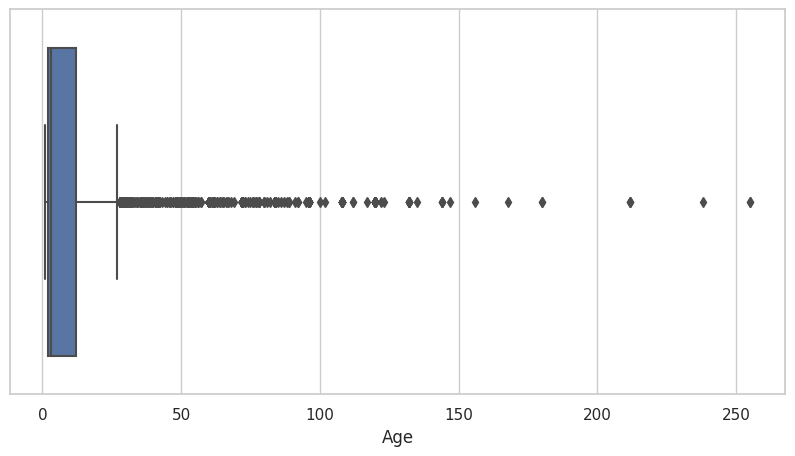

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Age', data=df_train, orient="h")

print(np.where(df_train['Age']>100))

(array([   81,   901,   953,  1459,  2038,  2078,  2247,  2519,  2913,
        3701,  4356,  4797,  4844,  5092,  5289,  5902,  6077,  6306,
        7315,  8590,  8722,  8834,  8879,  9003,  9393,  9707,  9745,
        9782,  9947, 10477, 10621, 10624, 10930, 11426, 11519, 11687,
       12304, 12365, 12582, 13121, 13631, 14245, 14454, 14519]),)


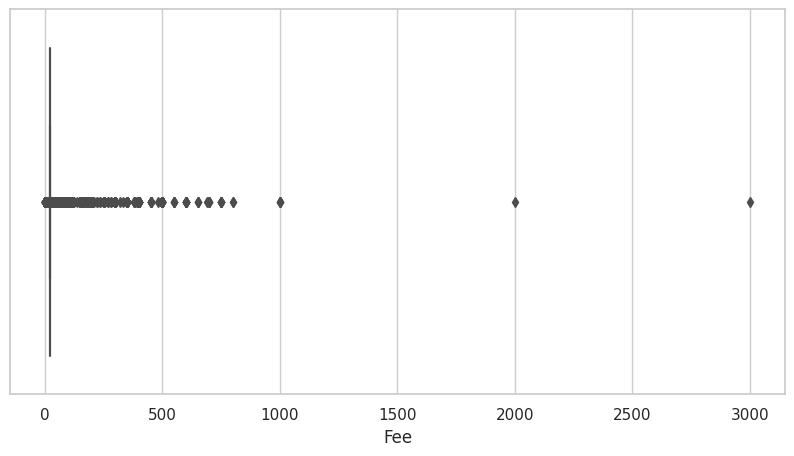

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Fee', data=df_train, orient="h")

print(np.where(df_train['Fee']>500))

(array([  263,   320,   396,   427,   823,  1088,  1302,  1305,  1377,
        1404,  1659,  2558,  2787,  2886,  3894,  4759,  5209,  5227,
        6091,  6291,  6332,  6997,  7094,  7847,  7875,  7966,  7993,
        8424,  8821,  9306,  9405,  9779,  9857,  9926, 11101, 11568,
       11729, 12792, 13383, 13596, 13599, 13865, 14583]),)


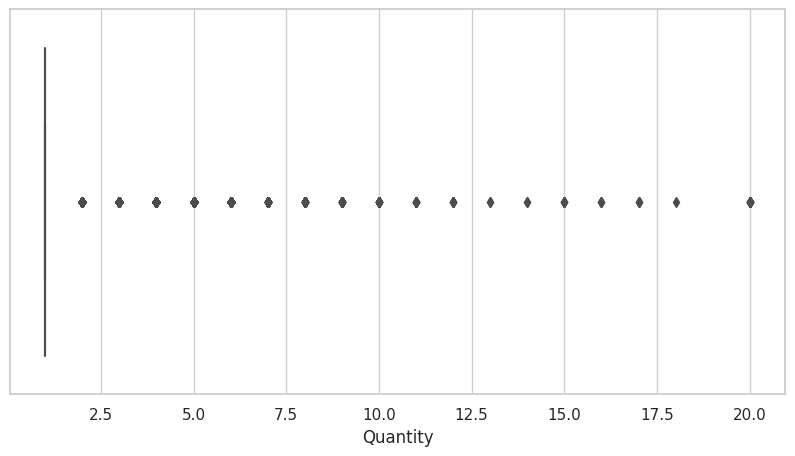

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Quantity', data=df_train, orient="h")

print(np.where(df_train['Quantity']>10))

### Data Preprocessing

* Data normalizarion, scaling and transformation

In [ ]:
# Using standardization for scaling train data outliers

# For numeric columns
numeric_cols = ['Age', 'Fee', 'Quantity']
numeric_cols_scaled = ['AgeScaled', 'FeeScaled', 'QuantityScaled']

for column in numeric_cols:
  df_train[numeric_cols_scaled] = (df_train[numeric_cols] - df_train[numeric_cols].mean()) / df_train[numeric_cols].std()

df_train.tail(2)

Type     Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
14991     2  Ms Daym    9     266       0       2       4       7       0   
14992     1     Fili    1     307     307       1       2       0       0   

       MaturitySize  ...  State                         RescuerID  VideoAmt  \
14991             1  ...  41336  c311c0c569245baa147d91fa4e351ae4         0   
14992             2  ...  41332  9ed1d5493d223eaa5024c1a031dbc9c2         0   

                                             Description      PetID  PhotoAmt  \
14991  she is very shy..adventures and independent..s...  e4da1c9e4       3.0   
14992  Fili just loves laying around and also loves b...  a83d95ead       1.0   

       AdoptionSpeed  AgeScaled FeeScaled  QuantityScaled  
14991              4  -0.082032 -0.243348       -0.391224  
14992              3  -0.523092 -0.243348       -0.391224  

[2 rows x 27 columns]

In [ ]:
# Using standardization for scaling test data outliers

# For numeric columns
numeric_cols = ['Age', 'Fee', 'Quantity']
numeric_cols_scaled = ['AgeScaled', 'FeeScaled', 'QuantityScaled']

for column in numeric_cols:
  df_test[numeric_cols_scaled] = (df_test[numeric_cols] - df_test[numeric_cols].mean()) / df_test[numeric_cols].std()

df_test.tail(2)

Type     Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
3970     1   Smokey   24     307       0       2       5       7       0   
3971     2  Unknown    1     266       0       3       1       7       0   

      MaturitySize  ...        Fee  State                         RescuerID  \
3970             2  ...  21.769637  41325  087903c2819a6297519c93d962b488d5   
3971             1  ...  21.769637  41326  041876679ae0261e3ee4aefe9e66316f   

      VideoAmt                                        Description      PetID  \
3970         0  smokey is good family pet. very obedient,so lo...  fd80b8c80   
3971         0  Found abandoned with the mother at nearby shop...  493ed84ae   

      PhotoAmt  AgeScaled FeeScaled  QuantityScaled  
3970       3.0   0.725031  -0.25028       -0.397970  
3971       1.0  -0.591002  -0.25028        2.934107  

[2 rows x 26 columns]

### Exploring the correlation within features and the target variable:

* Upon analyzing the frequency counts for pet types (1 for 'Dog' and 2 for 'Cat') and Adoption Speed (target variable).
* The Adoption Speed is a categorical feature that represents the speed of adoption. For instance, lower is faster.

* **We should use Chi-squared test for the association between each categorical variable and the target variable**

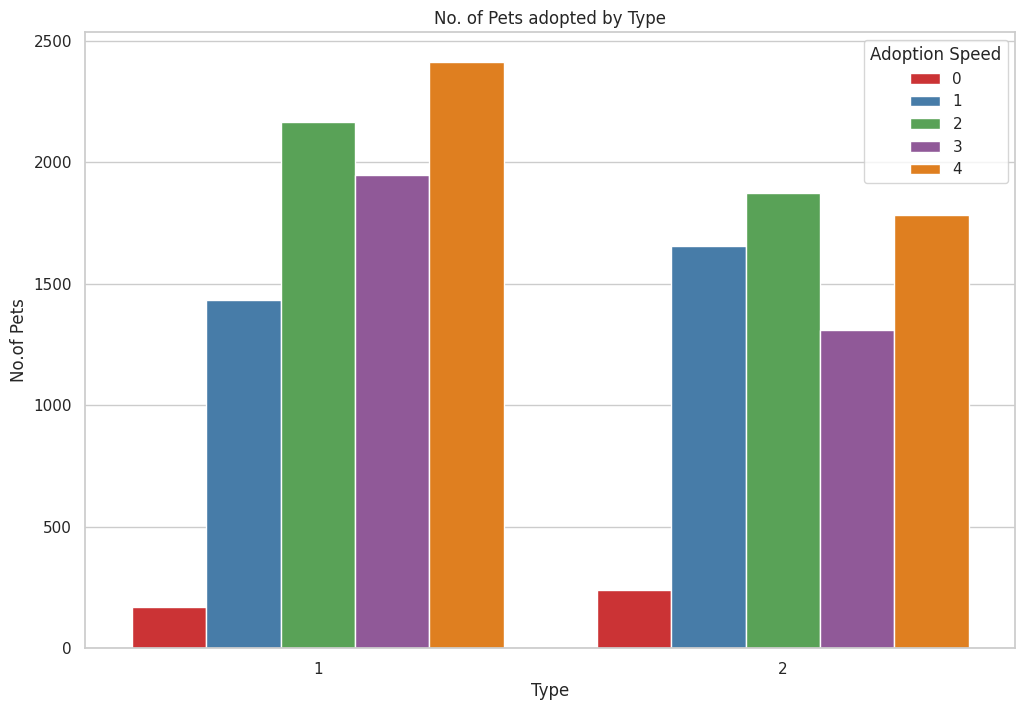

In [ ]:
  plt.figure(figsize=(12,8))
  axis = sns.countplot(x = "Type", hue = "AdoptionSpeed", palette = "Set1", data = df_train)
  axis.set(title = "No. of Pets adopted by Type", xlabel = "Type",ylabel = "No.of Pets")
  plt.legend(loc='upper right', title='Adoption Speed')
  plt.show()

It's observed there are slightly more Dogs than Cats and the Cats are adopted a bit faster.

In [ ]:
df_dogs = df_train[df_train['Type']==1]
df_dogs[['AdoptionSpeed', 'PetID']].groupby(['AdoptionSpeed'], as_index=False).count().sort_values(by='AdoptionSpeed', ascending=True)

AdoptionSpeed  PetID
0              0    170
1              1   1435
2              2   2164
3              3   1949
4              4   2414

In [ ]:
df_cats = df_train[df_train['Type']==2]
df_cats[['AdoptionSpeed', 'PetID']].groupby(['AdoptionSpeed'], as_index=False).count().sort_values(by='AdoptionSpeed', ascending=True)

AdoptionSpeed  PetID
0              0    240
1              1   1655
2              2   1873
3              3   1310
4              4   1783

* The following feature provides the gender of pet. It is coded as follows: 1 for 'Male', 2 for 'Female', and 3 for 'Mixed' when the profile represents a group of pets.

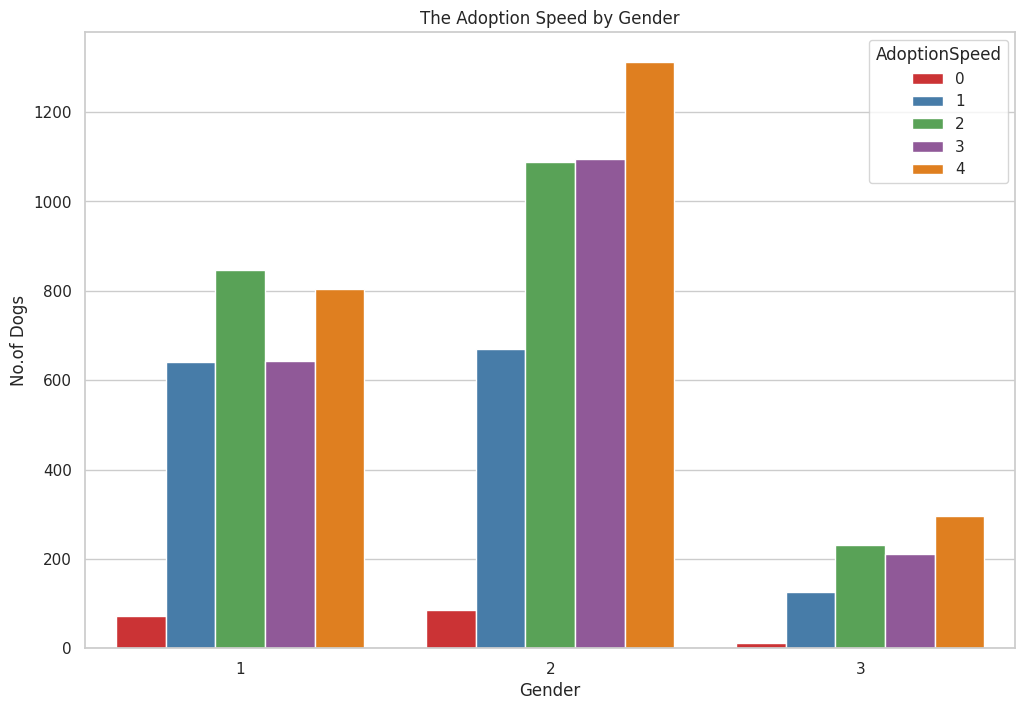

In [ ]:
plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Gender", hue = "AdoptionSpeed", palette = "Set1", data = df_dogs )
axis.set(title = "The Adoption Speed by Gender", xlabel = "Gender",ylabel = "No.of Dogs")
plt.show()

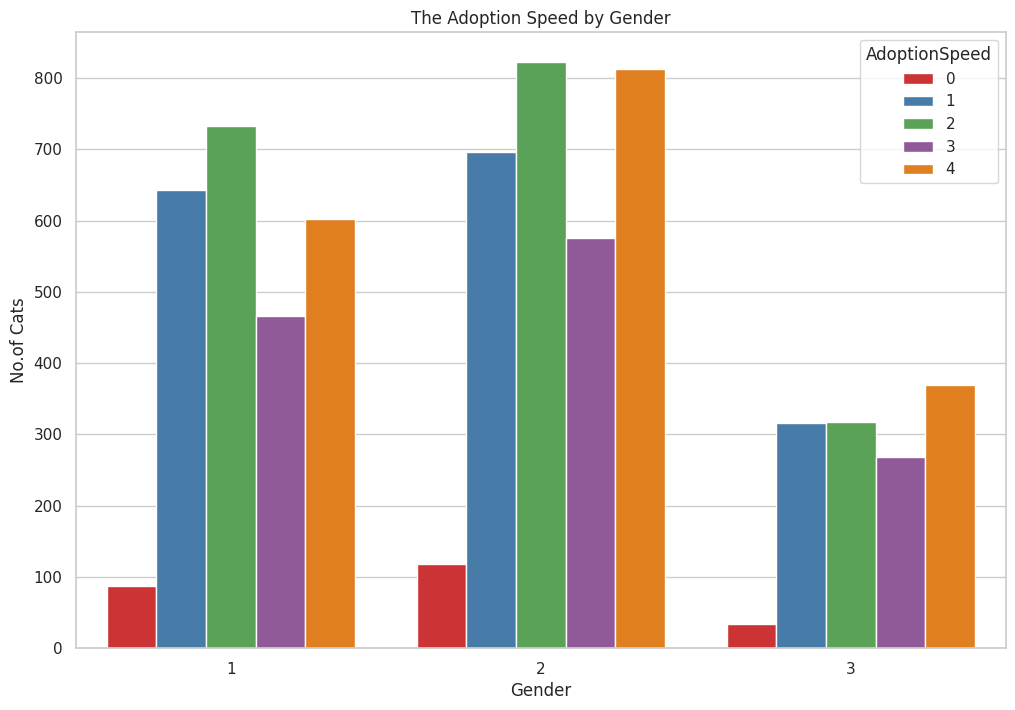

In [ ]:
plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Gender", hue = "AdoptionSpeed", palette = "Set1", data = df_cats )
axis.set(title = "The Adoption Speed by Gender", xlabel = "Gender",ylabel = "No.of Cats")
plt.show()

Both types of pets showed that females have a higher adoption speed than males.

In [ ]:
# Adding Gender labels
df_train['GenderName'] = df_train['Gender'].map({1:'Male', 2:'Female', 3:'Mixed'})

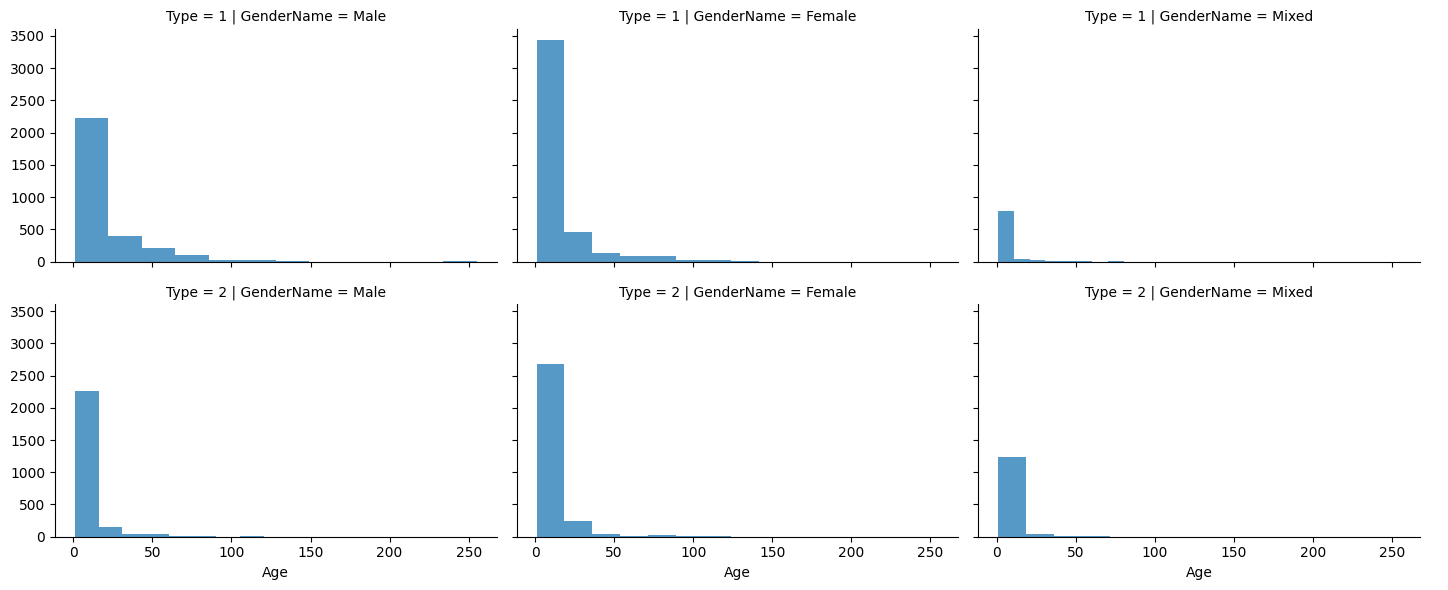

In [ ]:
grid = sns.FacetGrid(df_train, col='GenderName',row='Type', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.75, bins=12)
grid.add_legend()

Examining the chart above, we can observe a broad distribution of age among female cats and dogs.

The pets exhibited a high distribution in age, indicating they were recently born.

It also indicates that pets with mixed genders had the lowest age distribution.

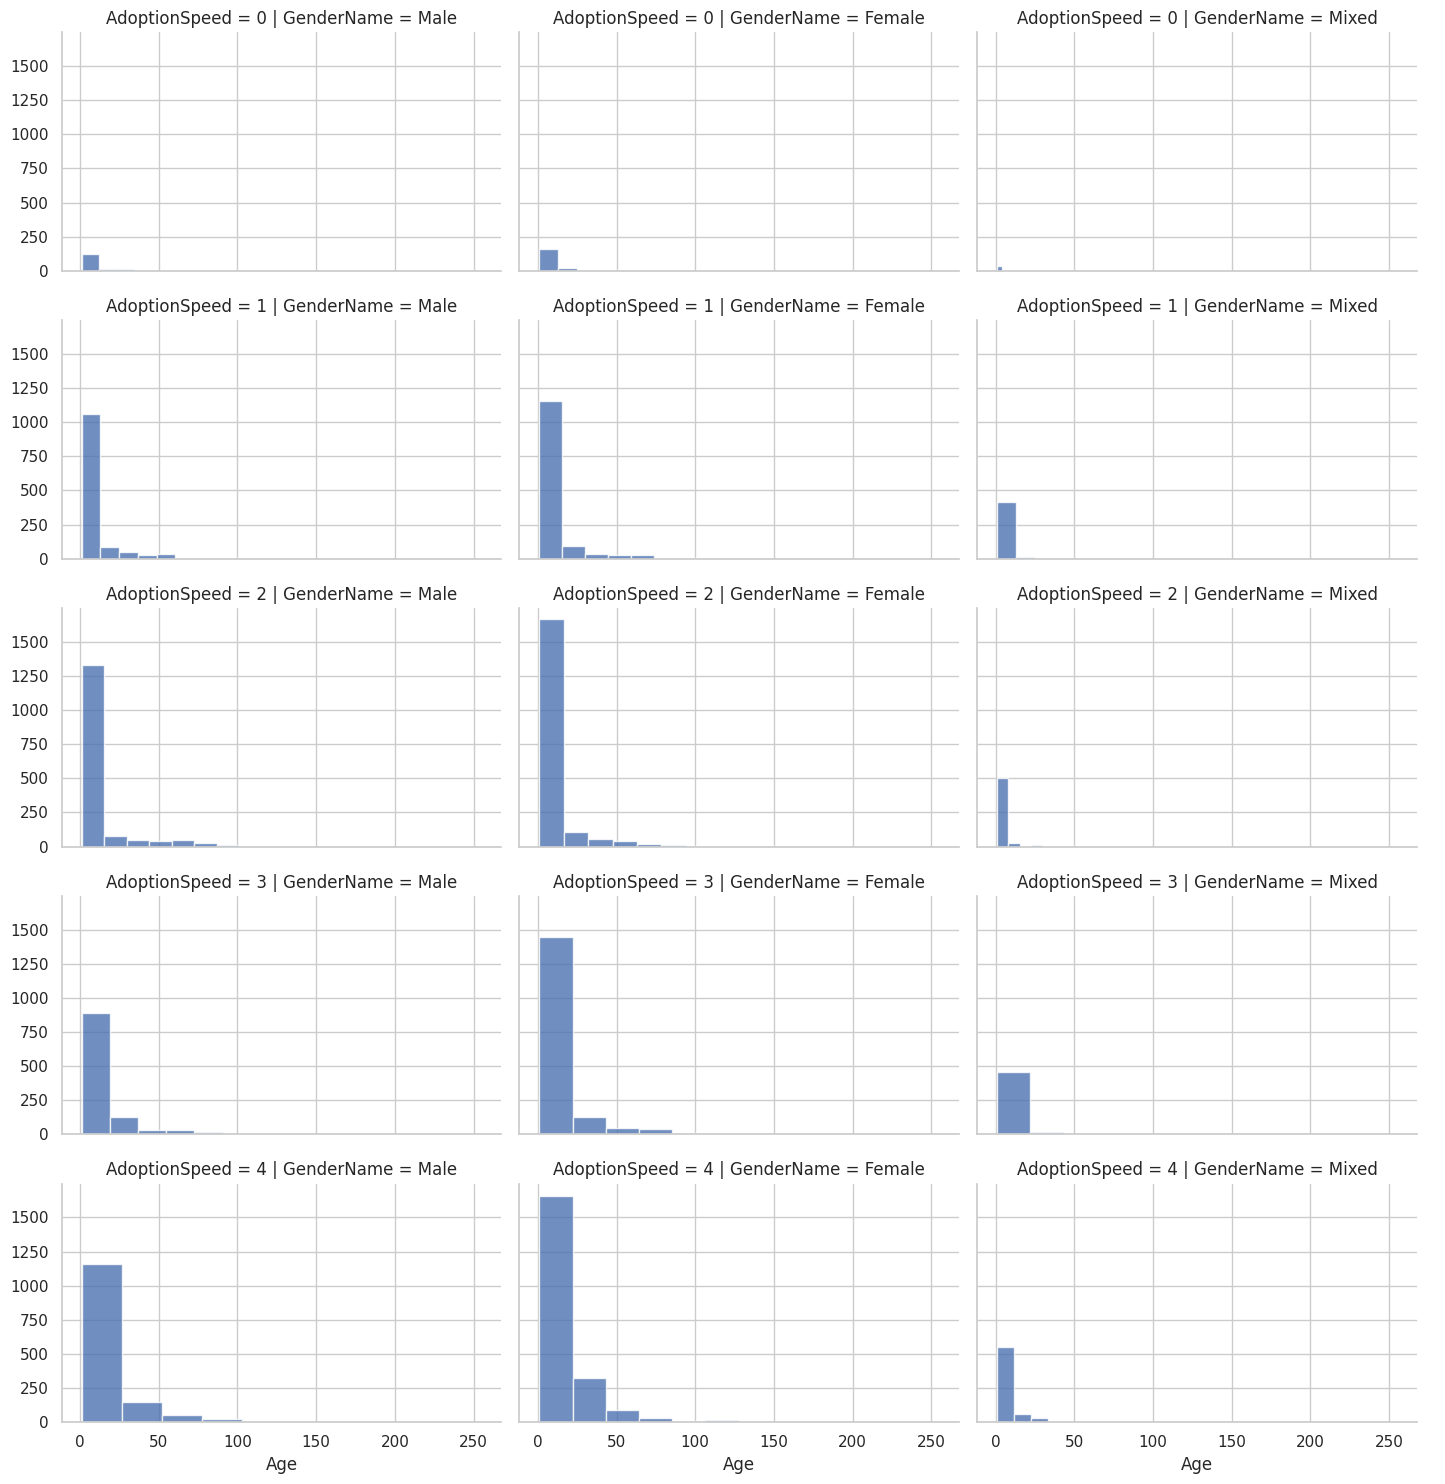

In [ ]:
grid = sns.FacetGrid(df_train, col='GenderName',row='AdoptionSpeed', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=10)
grid.add_legend()

The chart above illustrates the age distribution for cats and dogs by gender and their adoption speed.

In [ ]:
df_train.corr()

<ipython-input-30-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


Type       Age    Breed1    Breed2    Gender    Color1  \
Type            1.000000 -0.147038  0.057724 -0.043568  0.060843  0.097680   
Age            -0.147038  1.000000 -0.314597 -0.041049 -0.122215  0.089955   
Breed1          0.057724 -0.314597  1.000000 -0.157053  0.071321 -0.035510   
Breed2         -0.043568 -0.041049 -0.157053  1.000000  0.056907 -0.020324   
Gender          0.060843 -0.122215  0.071321  0.056907  1.000000 -0.115351   
Color1          0.097680  0.089955 -0.035510 -0.020324 -0.115351  1.000000   
Color2          0.246333 -0.039586 -0.007081  0.003015  0.026507 -0.113290   
Color3          0.201693 -0.052880 -0.000682  0.035679  0.259309 -0.282897   
MaturitySize   -0.171811  0.093094 -0.010507  0.049879 -0.091819 -0.029468   
FurLength       0.003036  0.152823 -0.108059  0.106220 -0.030404  0.066967   
Vaccinated      0.102907 -0.135151  0.046518  0.005638  0.078702 -0.017475   
Dewormed        0.025508 -0.051985  0.013216 -0.009817  0.091431 -0.019318   
Sterilized      0.006737 -0.188966  0.052698 -0.005989  0.040645 -0.037050   
Health         -0.006864  0.103728 -0.034893 -0.029285 -0.045177  0.024410   
Quantity        0.036423 -0.111202  0.090194  0.038125  0.494489 -0.116688   
Fee            -0.047583  0.089362 -0.190975  0.010657 -0.047893  0.050779   
State           0.124549  0.024514 -0.026832 -0.037993  0.002564  0.024012   
VideoAmt       -0.005967 -0.016085  0.020626  0.001569  0.016816 -0.006435   
PhotoAmt        0.049368 -0.084709  0.043395  0.045953  0.098435 -0.041323   
AdoptionSpeed  -0.091240  0.100126  0.107834 -0.018642  0.057622 -0.044192   
AgeScaled      -0.147038  1.000000 -0.314597 -0.041049 -0.122215  0.089955   
FeeScaled      -0.047583  0.089362 -0.190975  0.010657 -0.047893  0.050779   
QuantityScaled  0.036423 -0.111202  0.090194  0.038125  0.494489 -0.116688   

                  Color2    Color3  MaturitySize  FurLength  ...    Health  \
Type            0.246333  0.201693     -0.171811   0.003036  ... -0.006864   
Age            -0.039586 -0.052880      0.093094   0.152823  ...  0.103728   
Breed1         -0.007081 -0.000682     -0.010507  -0.108059  ... -0.034893   
Breed2          0.003015  0.035679      0.049879   0.106220  ... -0.029285   
Gender          0.026507  0.259309     -0.091819  -0.030404  ... -0.045177   
Color1         -0.113290 -0.282897     -0.029468   0.066967  ...  0.024410   
Color2          1.000000  0.088742     -0.065155  -0.008764  ... -0.004307   
Color3          0.088742  1.000000     -0.051730   0.013581  ... -0.024782   
MaturitySize   -0.065155 -0.051730      1.000000   0.095142  ... -0.012957   
FurLength      -0.008764  0.013581      0.095142   1.000000  ...  0.028096   
Vaccinated      0.026193  0.054053     -0.087722  -0.006010  ...  0.078893   
Dewormed        0.005812  0.048617     -0.067352   0.016463  ...  0.072188   
Sterilized      0.007370  0.038899     -0.066321   0.032092  ...  0.057916   
Health         -0.004307 -0.024782     -0.012957   0.028096  ...  1.000000   
Quantity        0.019876  0.272548     -0.042832  -0.038388  ... -0.034567   
Fee            -0.018441 -0.020458      0.040549   0.158679  ... -0.009325   
State           0.026944  0.010554     -0.062584  -0.029317  ...  0.026237   
VideoAmt        0.023983  0.019526      0.017032  -0.014740  ... -0.004984   
PhotoAmt        0.059113  0.103662      0.015593  -0.031557  ... -0.023978   
AdoptionSpeed  -0.038579 -0.007014      0.045653  -0.091337  ...  0.029382   
AgeScaled      -0.039586 -0.052880      0.093094   0.152823  ...  0.103728   
FeeScaled      -0.018441 -0.020458      0.040549   0.158679  ... -0.009325   
QuantityScaled  0.019876  0.272548     -0.042832  -0.038388  ... -0.034567   

                Quantity       Fee     State  VideoAmt  PhotoAmt  \
Type            0.036423 -0.047583  0.124549 -0.005967  0.049368   
Age            -0.111202  0.089362  0.024514 -0.016085 -0.084709   
Breed1          0.090194 -0.190975 -0.026832  0.020626  0.043395   
Br

In [ ]:
# Compute the correlation between features and the target variable (e.g., 'AdoptionSpeed')
corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)

# Display the top N features with the highest absolute correlation to the target variable
top_n = 19 # Change this number to display a different number of top features
top_features_to_target = corr_to_target[1:top_n]  # Exclude the target variable
print("Top", top_n, "features with highest correlation to the target:")
print(top_features_to_target)

Top 19 features with highest correlation to the target:
Breed1            0.107834
Age               0.100126
AgeScaled         0.100126
FurLength         0.091337
Type              0.091240
Sterilized        0.083447
QuantityScaled    0.062931
Quantity          0.062931
Vaccinated        0.059043
Gender            0.057622
MaturitySize      0.045653
Color1            0.044192
Color2            0.038579
Health            0.029382
PhotoAmt          0.023233
Breed2            0.018642
Dewormed          0.013210
State             0.013119
Name: AdoptionSpeed, dtype: float64


<ipython-input-31-b2fef085a61e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)


<ipython-input-32-0950cef5160c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr(method='spearman').round(2)


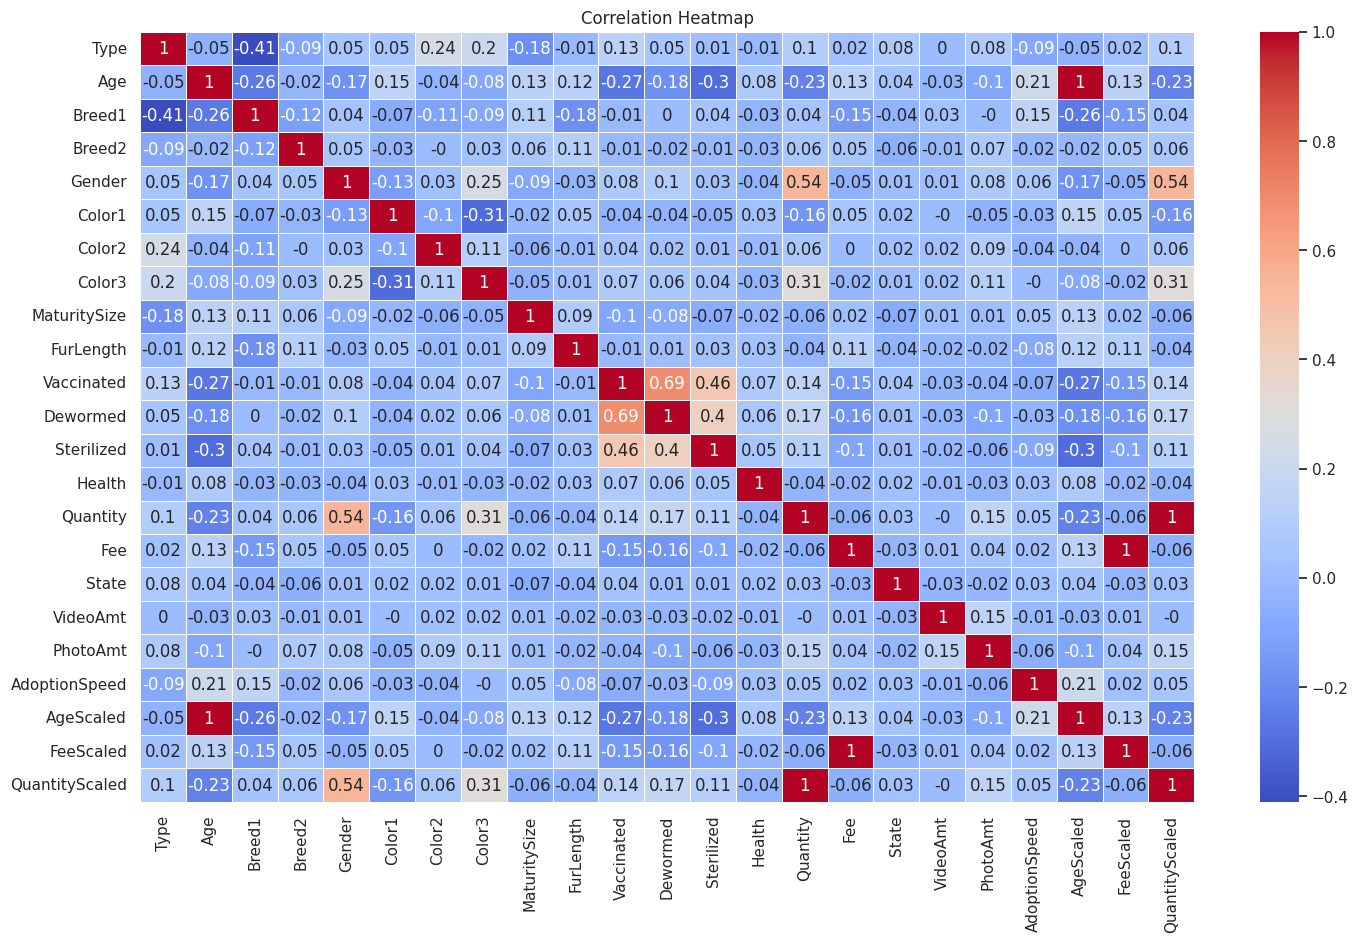

In [ ]:
# detecting multi co linearity to stop data leakage

# Compute the correlation matrix between all features
correlation_matrix = df_train.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Specify the correlation threshold as values greater than 0.4 or less than -0.4
correlation_threshold = 0.4  # We can adjust this value

# Create a mask to identify pairs of features with correlation exceeding the threshold
high_correlation_mask = (abs(correlation_matrix) > correlation_threshold) & (correlation_matrix != 1.0)

# Identify the indices (pairs) of highly correlated features
high_correlation_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i + 1, len(correlation_matrix.columns)) if high_correlation_mask.iloc[i, j]]

# Determine which feature to drop from each high-correlation pair
features_to_drop = []
for i, j in high_correlation_pairs:
    feature_i = correlation_matrix.columns[i]
    feature_j = correlation_matrix.columns[j]

    # Drop the feature with the higher index
    if i > j:
        features_to_drop.append(feature_i)
    else:
        features_to_drop.append(feature_j)

In [ ]:
features_to_drop = set(features_to_drop)
features_to_drop

{'Breed1', 'Dewormed', 'Quantity', 'Sterilized'}

### Feature Engineering

In [ ]:
df_train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'AgeScaled', 'FeeScaled', 'QuantityScaled', 'GenderName'],
      dtype='object')

In [ ]:
# Adding features engineering for train dataset

# Concatenating Breed1, Age and Furlength features
df_train['Breed1AgeFurLength'] = (df_train['Breed1'].astype(str) + np.abs(df_train['AgeScaled']).astype(str) + df_train['FurLength'].astype(str)).astype(float)

# Concatenating binary features such as Vaccinated, Dewormed and Sterilized
df_train['VDSCombination'] = (df_train['Vaccinated'].astype(str) + df_train['Dewormed'].astype(str) + df_train['Sterilized'].astype(str)).astype(float)

# Creating a color count feature without including cases where any color is 0
df_train['ColorCount'] = df_train[['Color1', 'Color2', 'Color3']].apply(lambda row: len([color for color in row if color != 0]), axis=1)

# Creating a total visual media feature
df_train['TotalVisualMedia'] = df_train['PhotoAmt'] + df_train['VideoAmt']

# Creating a description length feature
df_train['DescriptionLength'] = df_train['Description'].apply(lambda x: len(str(x)))

# Creating a sentiment score feature
from textblob import TextBlob
df_train['SentimentScore'] = df_train['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
# Adding features engineering for test dataset

# Concatenating Breed1, Age and Furlength features
df_test['Breed1AgeFurLength'] = (df_test['Breed1'].astype(str) + np.abs(df_test['AgeScaled']).astype(str) + df_test['FurLength'].astype(str)).astype(float)

# Concatenating binary features such as Vaccinated, Dewormed and Sterilized
df_test['VDSCombination'] = (df_test['Vaccinated'].astype(str) + df_test['Dewormed'].astype(str) + df_test['Sterilized'].astype(str)).astype(float)

# Creating a color count feature without including cases where any color is 0
df_test['ColorCount'] = df_test[['Color1', 'Color2', 'Color3']].apply(lambda row: len([color for color in row if color != 0]), axis=1)

# Creating a total visual media feature
df_test['TotalVisualMedia'] = df_test['PhotoAmt'] + df_test['VideoAmt']

# Creating a description length feature
df_test['DescriptionLength'] = df_test['Description'].apply(lambda x: len(str(x)))

# Creating a sentiment score feature
from textblob import TextBlob
df_test['SentimentScore'] = df_test['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
# Adding image features to dataset

# First finding the position of '-' in PetID
df_image['pos'] = df_image['PetID'].str.find('-')
df_image.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

# Using position to slice PetID using a lambda function
df_image['PetID'] = df_image.apply(lambda x: x['PetID'][0:x['pos']],axis=1)
df_image.drop(columns=['pos'], axis=1, inplace=True)

df_train = pd.merge(df_train, df_image, how="inner", on=["PetID"], copy=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58311 entries, 0 to 58310
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                58311 non-null  int64  
 1   Name                58311 non-null  object 
 2   Age                 58311 non-null  int64  
 3   Breed1              58311 non-null  int64  
 4   Breed2              58311 non-null  int64  
 5   Gender              58311 non-null  int64  
 6   Color1              58311 non-null  int64  
 7   Color2              58311 non-null  int64  
 8   Color3              58311 non-null  int64  
 9   MaturitySize        58311 non-null  int64  
 10  FurLength           58311 non-null  int64  
 11  Vaccinated          58311 non-null  int64  
 12  Dewormed            58311 non-null  int64  
 13  Sterilized          58311 non-null  int64  
 14  Health              58311 non-null  int64  
 15  Quantity            58311 non-null  int64  
 16  Fee 

In [ ]:
# detecting multi co linearity to stop data leakage

# Compute the correlation between features and the target variable (e.g., 'AdoptionSpeed')
corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)

# Display the top N features with the highest absolute correlation to the target
top_n = 16 # Change this number to display a different number of top features
top_features_to_target = corr_to_target[1:top_n]  # Exclude the target variable
print("Top", top_n, "features with highest correlation to the target:")
print(top_features_to_target)

<ipython-input-15-f26c33b7cdd8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_to_target = df_train.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)


Top 16 features with highest correlation to the target:
Sterilized            0.142998
Age                   0.114441
AgeScaled             0.114441
Vaccinated            0.112167
Type                  0.112119
VDSCombination        0.111070
FurLength             0.097280
Breed1                0.092313
num_checkpoints       0.085741
Contrast              0.085530
Correlation           0.085019
Breed1AgeFurLength    0.078735
QuantityScaled        0.063614
Quantity              0.063614
Dewormed              0.062410
Name: AdoptionSpeed, dtype: float64


In [ ]:
# Columns to add

# Columns to drop (To be analyze)
# df_train.drop(columns=['Breed1', 'Dewormed', 'Quantity', 'Sterilized'], inplace=True)

# Dropping label GenderName
df_train.drop('GenderName', axis=1, inplace=True)

# Print the resulting DataFrame
df_train.head()

# Save the resulting in a csv file
df_train.to_csv('preliminary_features.csv')

## Machine learning

### Splitting, Scaling & Modeling

In [ ]:
# Import library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate the target variable 'AdoptionSpeed from the features
predictor_variables = ['Age', 'Vaccinated', 'Type', 'VDSCombination', 'FurLength',
                       'num_checkpoints', 'Contrast', 'Correlation', 'Gender',
                       'SentimentScore', 'Color1', 'TotalVisualMedia', 'PhotoAmt']
target_variable = ['AdoptionSpeed']

x = df_train[predictor_variables]
y = df_train[target_variable]

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transforming "x_train"
x_train = scaler.fit_transform(x_train)

# Transforming "x_test"
x_test = scaler.transform(x_test)

pd.DataFrame(x_train,columns=predictor_variables).head()

Age  Vaccinated      Type  VDSCombination  FurLength  num_checkpoints  \
0 -0.370902    0.468319 -0.961422        0.364292   -0.76759         0.787709   
1  0.901638    0.468319 -0.961422        0.349832    0.92954         0.987606   
2 -0.431499    0.468319 -0.961422        0.508897   -0.76759        -0.098041   
3 -0.431499   -1.091102 -0.961422       -1.081760    0.92954        -0.670159   
4 -0.431499   -1.091102 -0.961422       -0.937155   -0.76759         0.038096   

   Contrast  Correlation    Gender  SentimentScore    Color1  \
0 -0.019876    -0.236922 -1.171434        0.195129 -0.688265   
1  2.560027    -2.671266 -1.171434       -0.863631  0.489512   
2 -0.567471     0.661889 -1.171434       -0.813094 -0.688265   
3 -0.527925     0.535995  0.229023        1.373584  1.667288   
4 -0.419508     0.623259  0.229023       -0.342775 -0.688265   

   TotalVisualMedia  PhotoAmt  
0          0.645129  0.169157  
1          0.142788  0.169157  
2         -0.359554 -0.349560  
3         -0.359554 -0.349560  
4         -0.359554 -0.349560

### Model 1: Decision Tree Classifier

In [ ]:
# Create and train using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=4)

model.fit(x_train, y_train)
y_pred_decision_tree = model.predict(x_test)

# Evaluate the accuracy score
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
acc_decision_tree

0.36749742768949356

### Model 2: Support Vector Classification

In [ ]:
# Create and train using SVC
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(x_train, y_train)
y_pred_svc = model.predict(x_test)

# Evaluate the accuracy score
acc_svc =  accuracy_score(y_test, y_pred_svc)
acc_svc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4387790099462673

### Model 3: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred_rf = model.predict(x_test)

# Evaluate the accuracy score
model.score(x_train, y_train)
acc_random_forest = accuracy_score(y_test, y_pred_rf)
acc_random_forest

<ipython-input-30-83d7d64f2a16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


0.8201669143706414

In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred_rf))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74       384
           1       0.79      0.78      0.78      3405
           2       0.81      0.83      0.82      4975
           3       0.90      0.80      0.85      4574
           4       0.76      0.85      0.80      4156

    accuracy                           0.82     17494
   macro avg       0.84      0.77      0.80     17494
weighted avg       0.82      0.82      0.82     17494

****************************************************************************************************


0     1     2     3     4
0  228    46    36    21    53
1    4  2661   321   102   317
2    3   285  4144   161   382
3    0   199   313  3680   382
4    1   195   278   131  3551

## Making new features and data transformations

In [4]:
#Loading dataset for making new features

#Prelimary data
df_prey = pd.read_csv('preliminary_features.csv', header=0)

#Image data
df_imgs = pd.read_csv('image_features.csv', header=0)
df_imgs = df_imgs[['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints']]

#Feature engineering on tabular data
df_tabr = pd.read_csv('train_df_mahmood_features.csv')
df_tabr = df_tabr[['PetID', 'num_breed', 'num_colors', 'Total_Vaccinations', 'Avg_Health_Score', 'Fur_Health_Interact', 'Fur_Health_Interact_Encoded', 'Overall_Health_Status', 'Overall_Health_Status_Encoded']]

#Sentiment data
df_sent = pd.read_csv('processed_train.csv', header=0)
df_sent = df_sent[['PetID', 'polarity', 'subjectivity']]

#Displaying first 5 rows
df_petf = pd.merge(df_prey, df_sent, how="inner", on=["PetID"], copy=True)
df_petf = pd.merge(df_petf, df_tabr, how="inner", on=["PetID"], copy=True)
df_petf.describe().T

count          mean         std  \
Type                           58004.0      1.479657    0.499590   
Age                            58004.0      9.120561   16.546462   
Breed1                         58004.0    267.577391   56.941263   
Breed2                         58004.0     79.240190  125.244320   
Gender                         58004.0      1.836615    0.713769   
Color1                         58004.0      2.167419    1.700134   
Color2                         58004.0      3.365682    2.685918   
Color3                         58004.0      2.162144    3.100565   
MaturitySize                   58004.0      1.869561    0.536885   
FurLength                      58004.0      1.450934    0.588925   
Vaccinated                     58004.0      1.700176    0.640602   
Dewormed                       58004.0      1.496880    0.659142   
Sterilized                     58004.0      1.882646    0.543191   
Health                         58004.0      1.032187    0.188771   
Quantity                       58004.0      1.759292    1.687708   
Fee                            58004.0     39.649641   74.636227   
State                          58004.0  41346.050583   32.550290   
VideoAmt                       58004.0      0.127888    0.596632   
PhotoAmt                       58004.0      7.010344    5.787131   
AdoptionSpeed                  58004.0      2.493069    1.123805   
AgeScaled                      58004.0     -0.075385    0.912250   
FeeScaled                      58004.0      0.005876    1.011499   
QuantityScaled                 58004.0      0.124432    1.146169   
Breed1AgeFurLength             58004.0   2690.094919  827.719220   
VDSCombination                 58004.0    186.869026   69.093251   
ColorCount                     58004.0      2.077426    0.767885   
TotalVisualMedia               58004.0      7.138232    5.979370   
DescriptionLength              58004.0    434.181850  479.030670   
SentimentScore                 58004.0      0.199207    0.170488   
Energy                         58004.0      0.034890    0.040219   
Contrast                       58004.0    199.335532  240.034987   
Correlation                    58004.0      0.968537    0.038515   
Entropy                        58004.0      7.391227    0.405313   
Mean                           58004.0    117.966993   27.887616   
Std_Dev                        58004.0     59.758696   12.852238   
num_checkpoints                58004.0    668.629681  579.969988   
polarity                       58004.0      0.199257    0.170415   
subjectivity                   58004.0      0.505440    0.197651   
num_breed                      58004.0      1.304220    0.460080   
num_colors                     58004.0      2.077426    0.767885   
Total_Vaccinations             58004.0      5.079701    1.535912   
Avg_Health_Score               58004.0      1.032187    0.188771   
Fur_Health_Interact_Encoded    58004.0      1.384991    1.780528   
Overall_Health_Status_Encoded  58004.0      0.029946    0.170440   

                                        min           25%           50%  \
Type                               1.000000      1.000000      1.000000   
Age                                1.000000      2.000000      3.000000   
Breed1                             0.000000    265.000000    266.000000   
Breed2                             0.000000      0.000000      0.000000   
Gender                             1.000000      1.000000      2.000000   
Color1                             1.000000      1.000000      1.000000   
Color2                             0.000000      0.000000      3.000000   
Color3                             0.000000      0.000000      0.000000   
MaturitySize                       1.000000      2.000000      2.000000   
FurLength                          1.000000      1.000000      1.000000   
Vaccinated                         1.000000      1.000000      2.000000   
Dewormed                           1.000000      1.000000      1.000000 

### Univariate Analysis for Outliers Detection

Age
Skew : 4.32


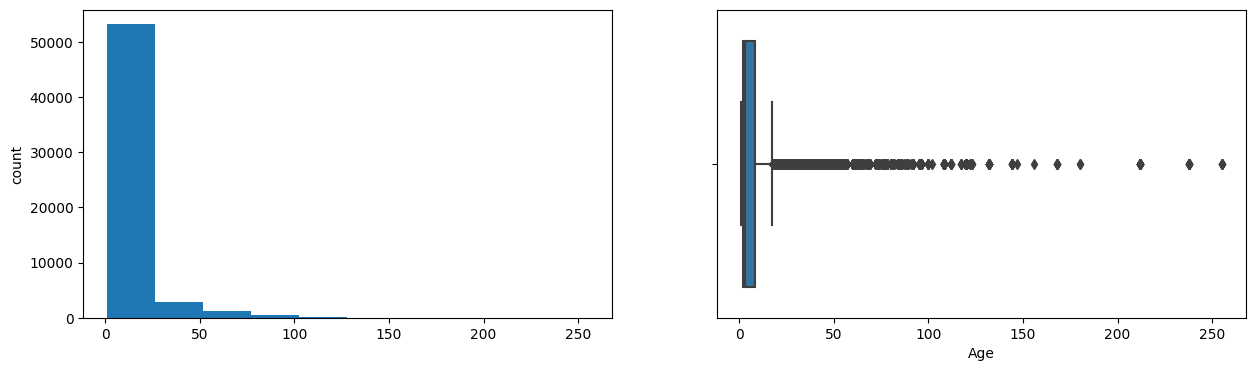

Fee
Skew : 10.56


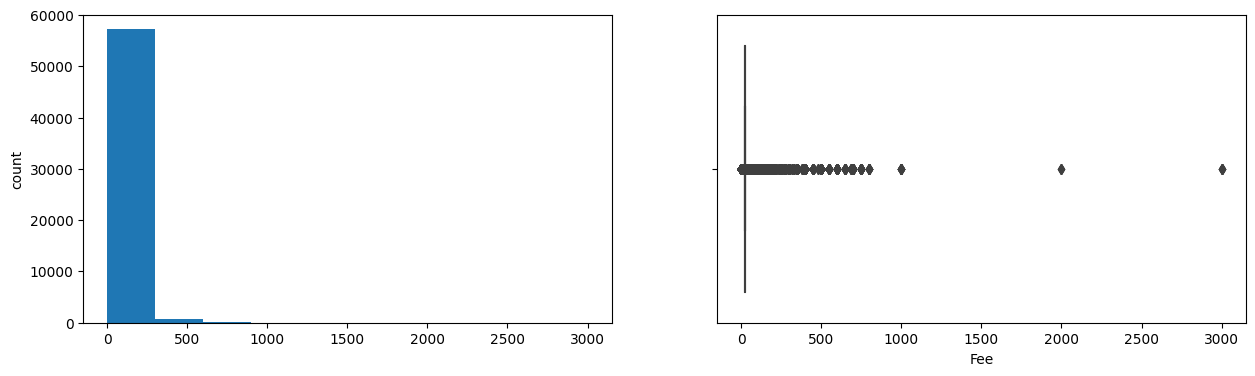

Quantity
Skew : 3.68


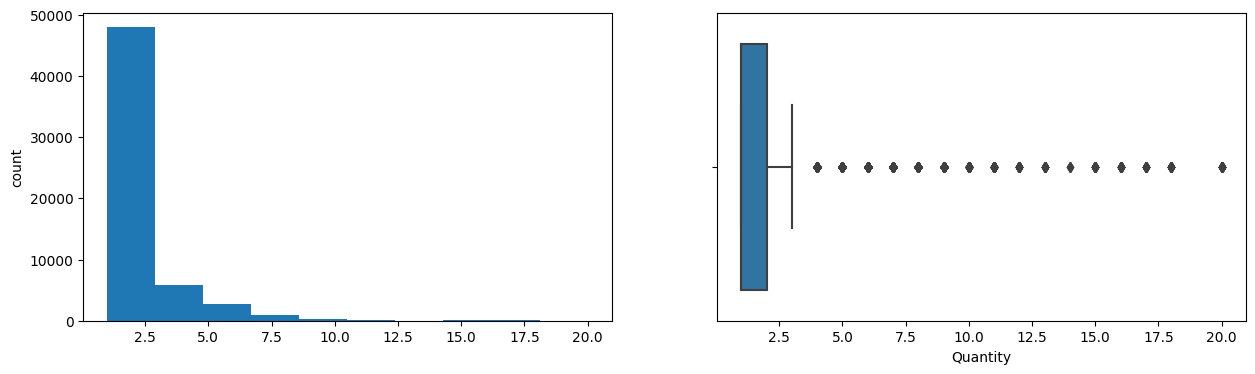

DescriptionLength
Skew : 3.51


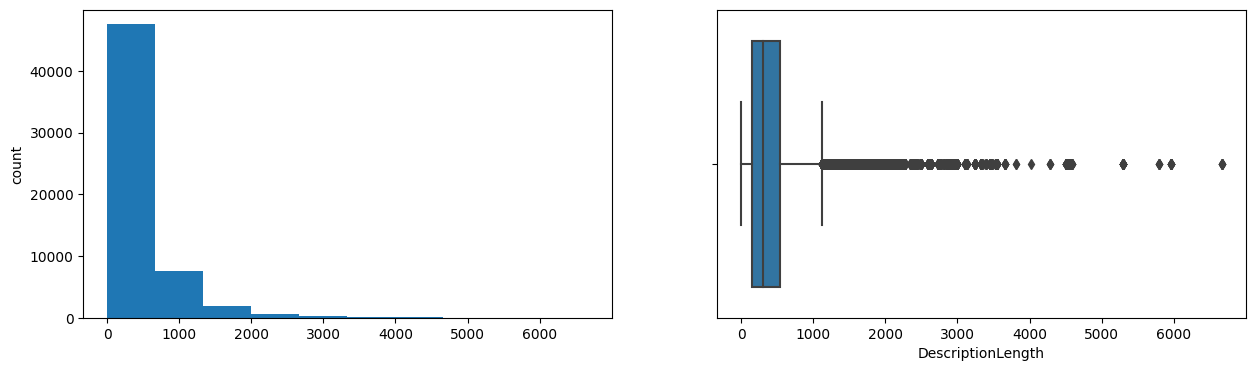

SentimentScore
Skew : 0.3


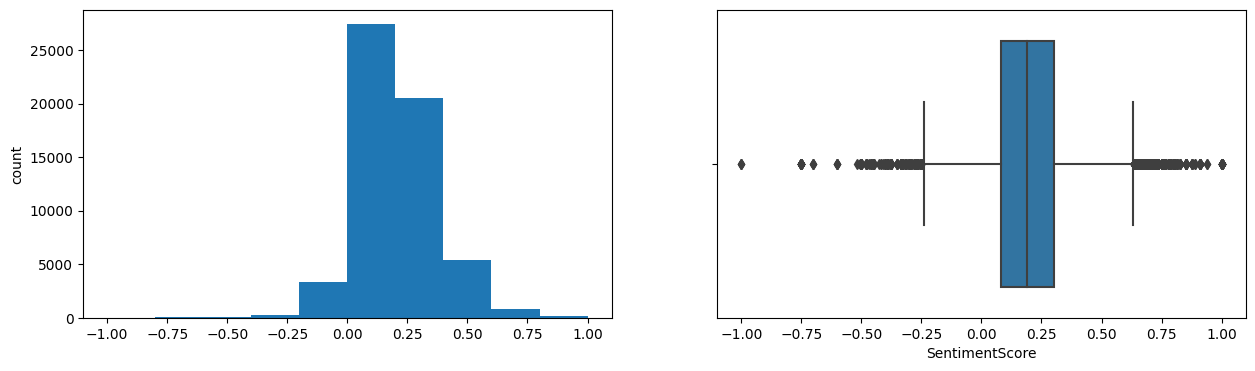

Energy
Skew : 7.17


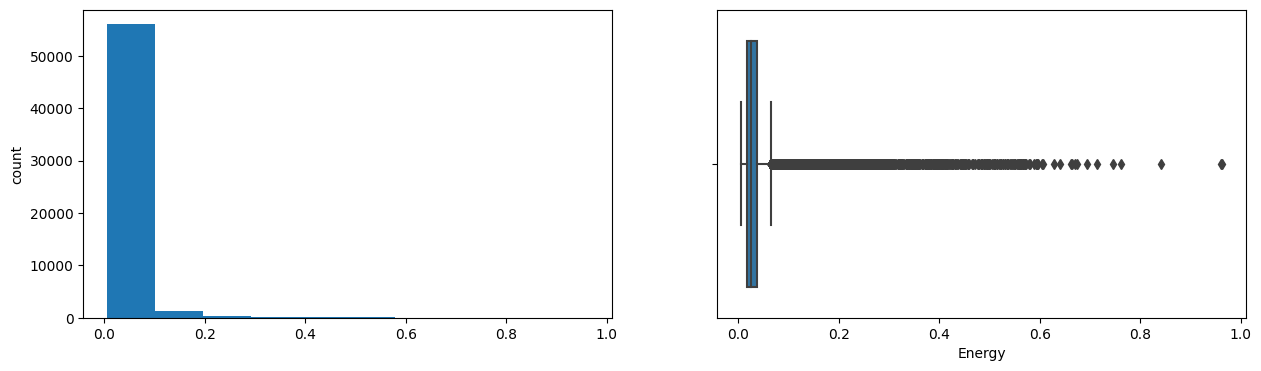

Contrast
Skew : 3.13


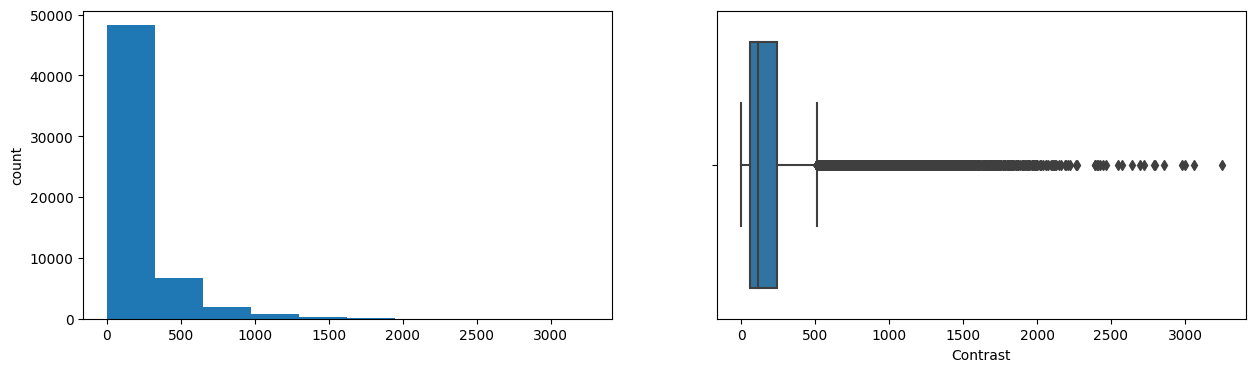

num_checkpoints
Skew : 2.76


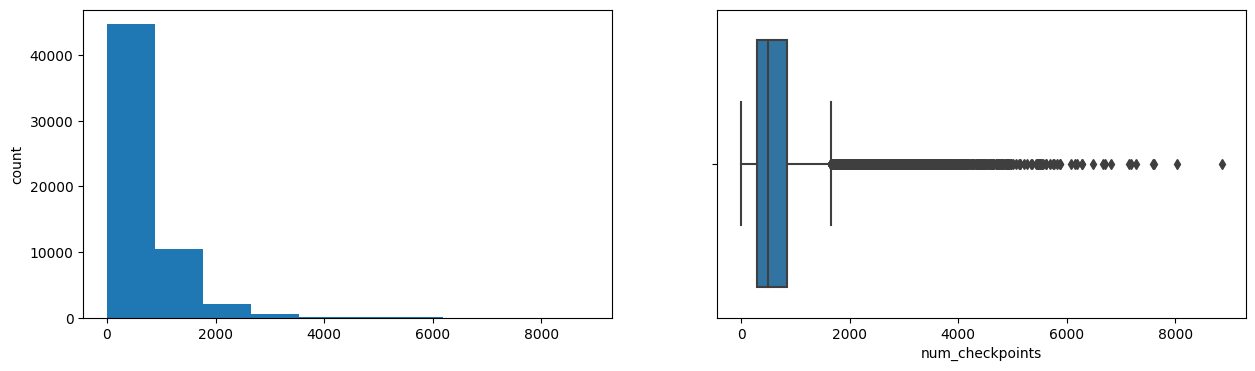

polarity
Skew : 0.3


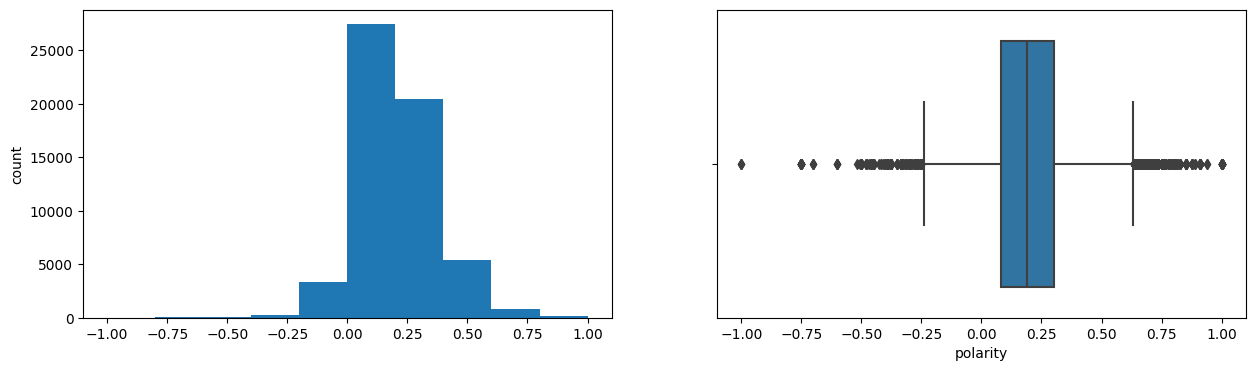

subjectivity
Skew : -0.7


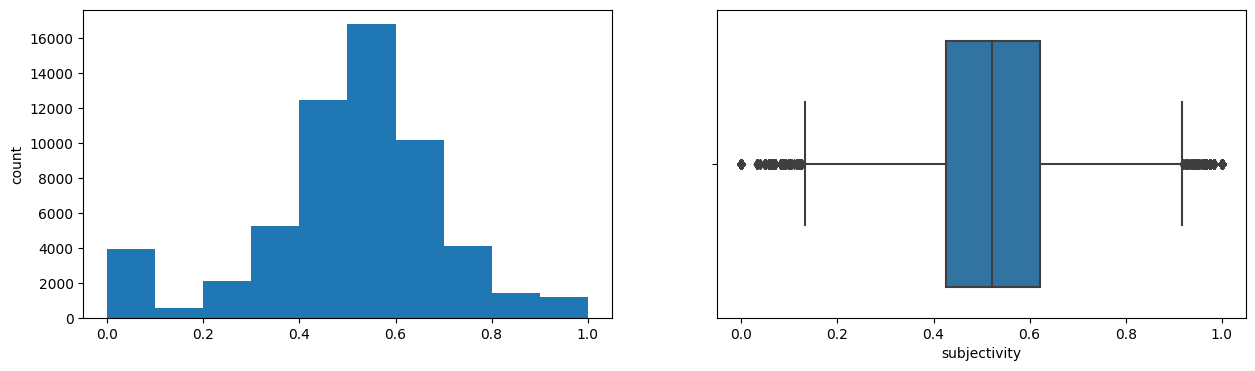

In [5]:
#Collecting numerical features for Univariate Analysis
numeric_cols = ['Age', 'Fee', 'Quantity', 'DescriptionLength',
            'SentimentScore', 'Energy', 'Contrast', 'num_checkpoints', 'polarity', 'subjectivity']

#Univariate Analysis
for column in numeric_cols:
    print(column)
    print('Skew :', round(df_petf[column].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_petf[column].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_petf[column])
    plt.show()

### Data Transformation

In [6]:
#Loading libraries
from scipy.stats import boxcox

#Using Log transformation for numeric columns
df_petf['Age_log'] = np.log1p(df_petf['Age'])
df_petf['Fee_log'] = np.log1p(df_petf['Fee'])
df_petf['Quantity_log'] = np.log1p(df_petf['Quantity'])
df_petf['DescriptionLength_log'] = np.log1p(df_petf['DescriptionLength'])
df_petf['Energy_log'] = np.log1p(df_petf['Energy'])
df_petf['Contrast_log'] = np.log1p(df_petf['Contrast'])
df_petf['num_checkpoints_log'] = np.log1p(df_petf['num_checkpoints'])

#Using Box-Cox transformation for numeric columns
df_petf['Age_boxcox'], lambda_value = boxcox(df_petf['Age'] + 1)
df_petf['Quantity_boxcox'], lambda_value = boxcox(df_petf['Quantity'] + 1)
df_petf['Fee_boxcox'], lambda_value = boxcox(df_petf['Fee'] + 1)
df_petf['Energy_boxcox'], lambda_value = boxcox(df_petf['Energy'] + 1)

#Using Exponential transformation for emphasizing the differences in small values
df_petf['SentimentScore_exp'] = np.exp(df_petf['SentimentScore'])
df_petf['polarity_exp'] = np.exp(df_petf['polarity'])
df_petf['subjectivity_exp'] = np.exp(df_petf['subjectivity'])
df_petf['Energy_exp'], lambda_value = boxcox(df_petf['Energy'] + 1)

#Using Square root transformation to mitigate the impact of large values
df_petf['DescriptionLength_sqrt'] = np.sqrt(df_petf['DescriptionLength'])
df_petf['Contrast_sqrt'] = np.sqrt(df_petf['Contrast'])
df_petf['num_checkpoints_sqrt'] = np.sqrt(df_petf['num_checkpoints'])


### Text Data Processing (NLP)

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Specify the target word for popularity (lowercased)
target_word = "language"

#Tokenization function
def tokenize(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

#Tokenize the text
df_petf['Tokenized_Text'] = df_petf['Description'].apply(tokenize)

# Calculate popularity for the target word
df_petf['Popularity'] = df_petf['Tokenized_Text'].apply(lambda tokens: tokens.count(target_word))

In [26]:
# Checking for new features created by data transformation
df_petf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58004 entries, 0 to 58003
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           58004 non-null  int64  
 1   Name                           58004 non-null  object 
 2   Age                            58004 non-null  int64  
 3   Breed1                         58004 non-null  int64  
 4   Breed2                         58004 non-null  int64  
 5   Gender                         58004 non-null  int64  
 6   Color1                         58004 non-null  int64  
 7   Color2                         58004 non-null  int64  
 8   Color3                         58004 non-null  int64  
 9   MaturitySize                   58004 non-null  int64  
 10  FurLength                      58004 non-null  int64  
 11  Vaccinated                     58004 non-null  int64  
 12  Dewormed                       58004 non-null 

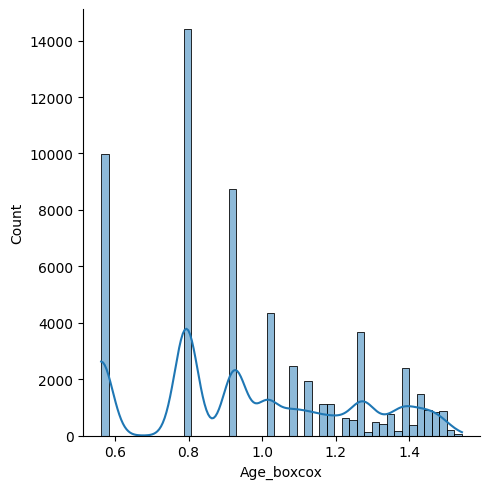

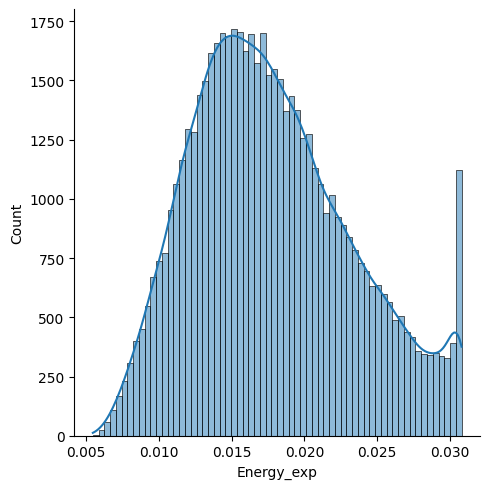

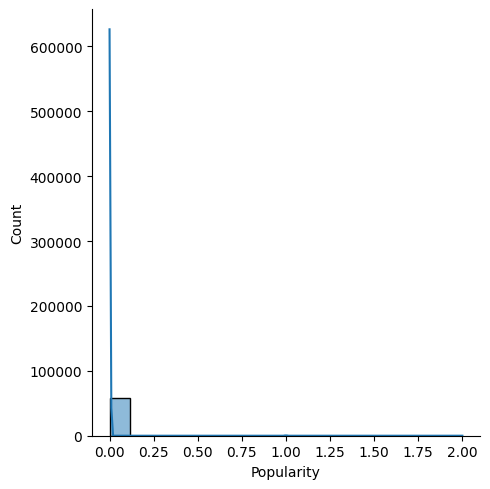

In [28]:
#Printing boxcox transformation for feature 'Age_log'
sns.displot(data = df_petf, x = "Age_boxcox", kde=True)

#Printing exponential transformation for feature 'Energy_log'
sns.displot(data = df_petf, x = "Energy_exp", kde=True)

#Printing popularity
sns.displot(data = df_petf, x = "Popularity", kde=True)

### Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

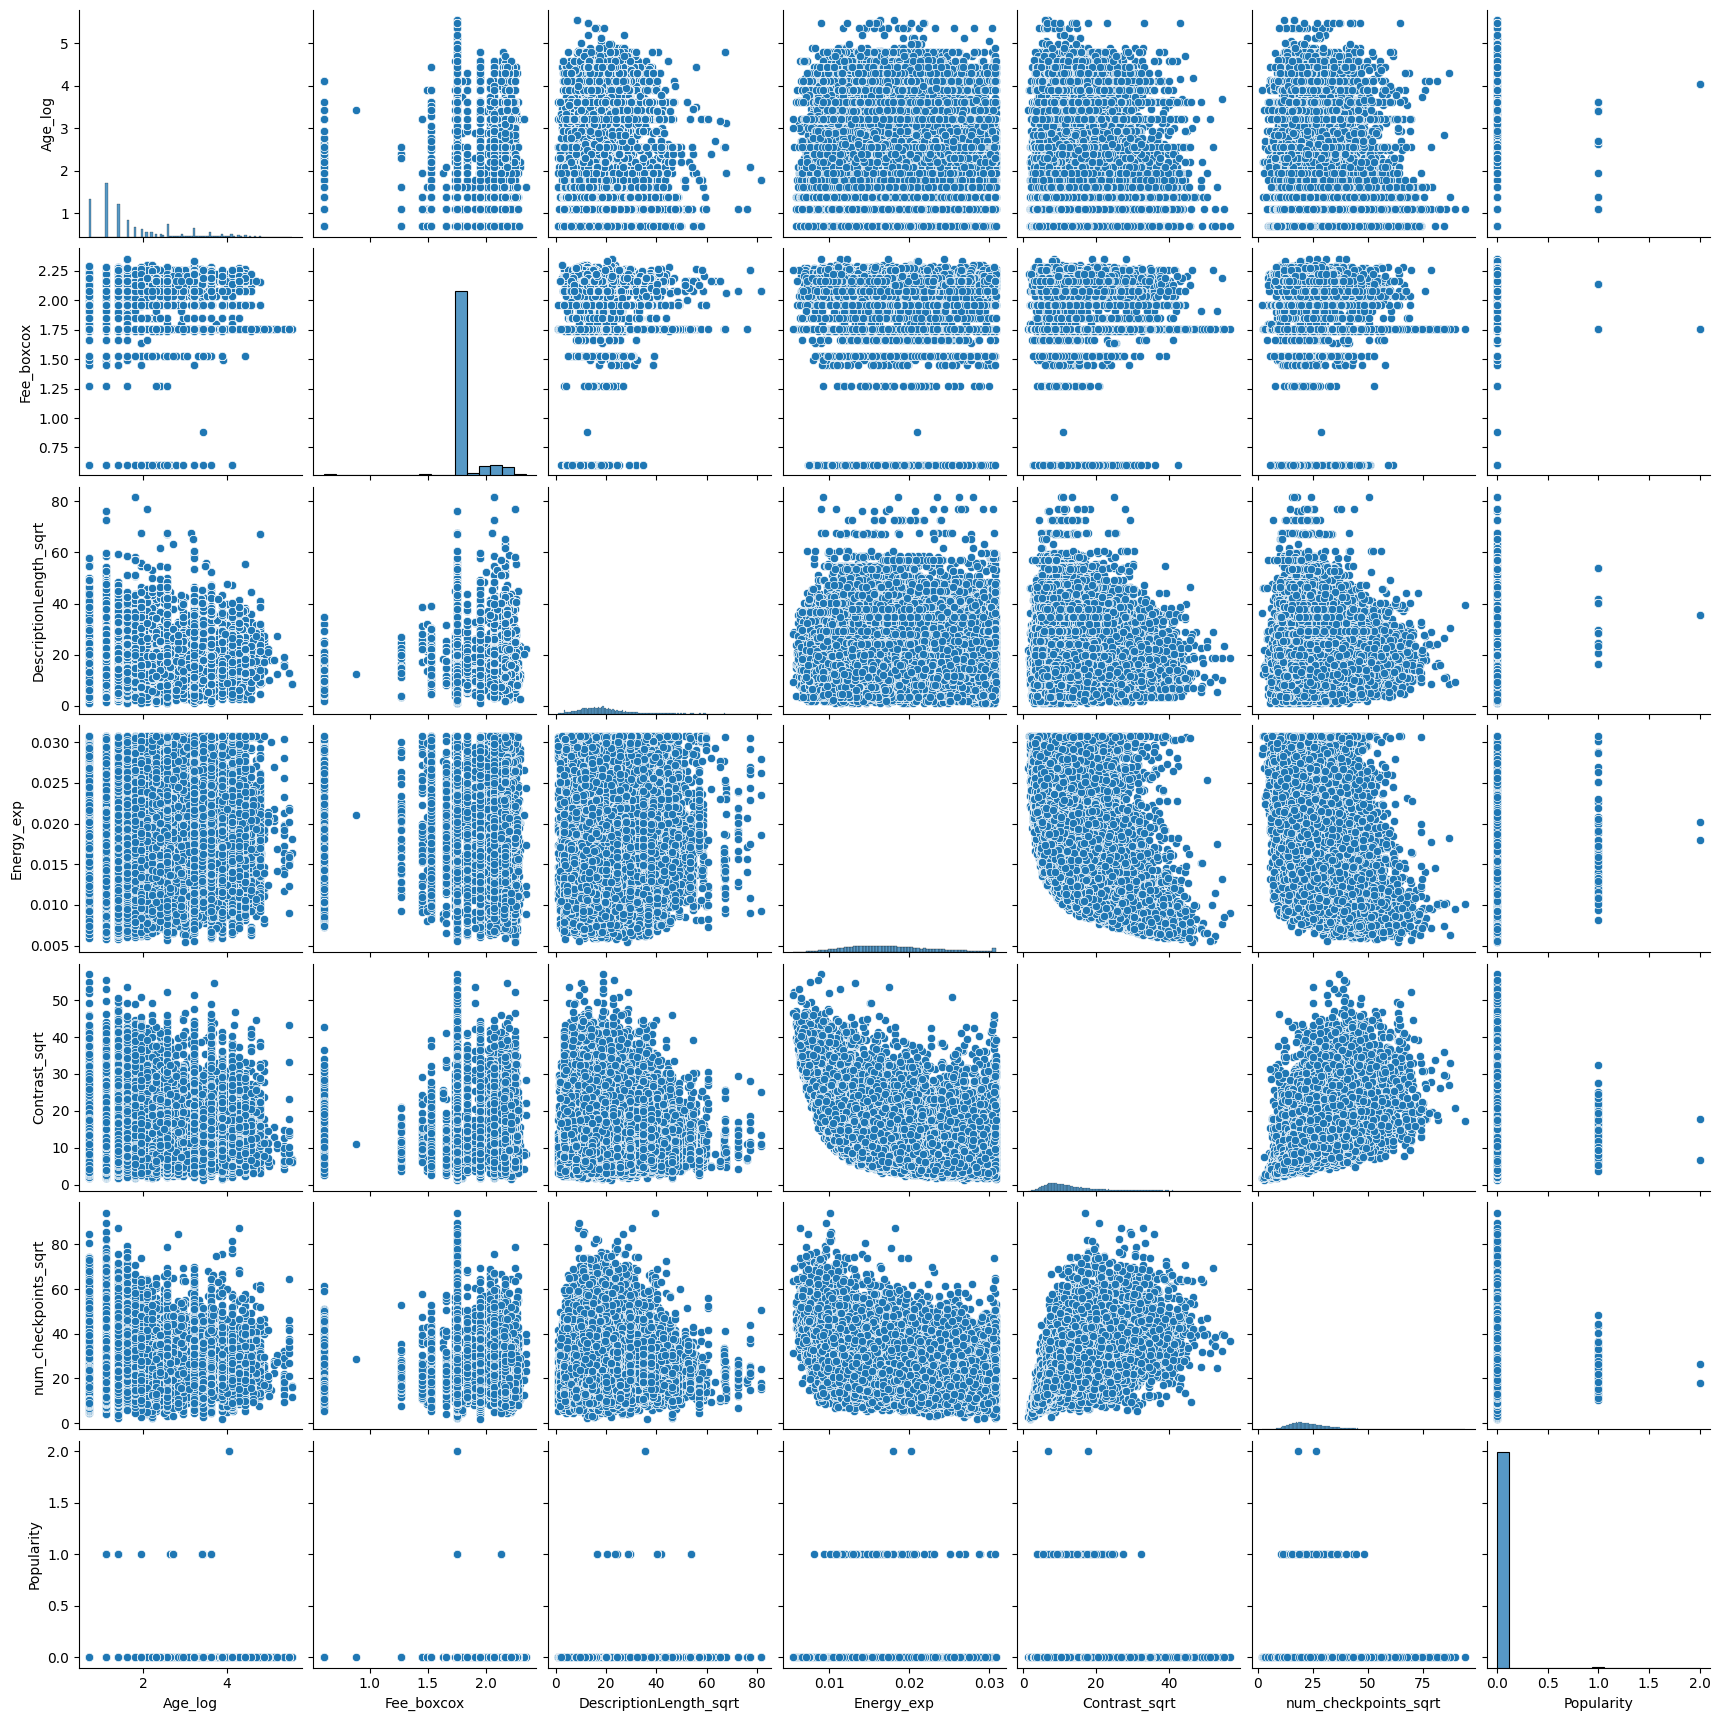

In [29]:
# Let's consider these features to identify correlations between each others in plots
features = ['Age_log', 'Fee_boxcox', 'DescriptionLength_sqrt',
            'Energy_exp', 'Contrast_sqrt', 'num_checkpoints_sqrt', 'Popularity']
plt.figure(figsize=(13,17))
sns.pairplot(data=df_petf[features])
plt.show()

### Multivariate Analysis

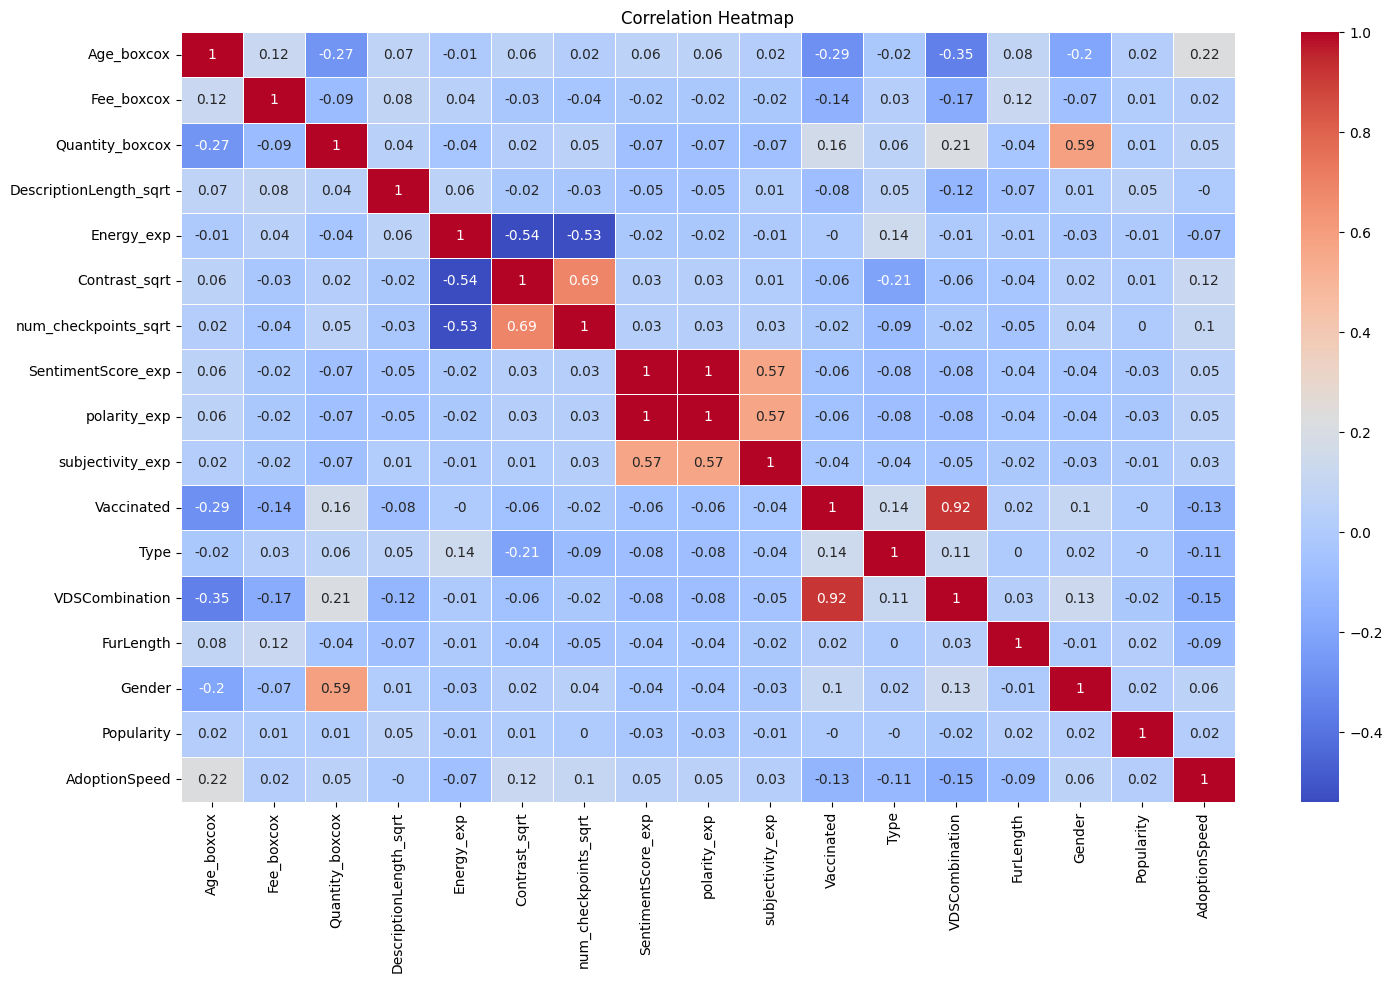

In [30]:
# detecting multi co linearity to stop data leakage

# Compute the correlation matrix between selected features
numeric_cols = ['Age_boxcox', 'Fee_boxcox', 'Quantity_boxcox', 'DescriptionLength_sqrt',
                'Energy_exp', 'Contrast_sqrt', 'num_checkpoints_sqrt',
                'SentimentScore_exp', 'polarity_exp', 'subjectivity_exp',
                'Vaccinated', 'Type', 'VDSCombination', 'FurLength', 'Gender',
                'Popularity',
                'AdoptionSpeed']

new_df_petf = pd.DataFrame(df_petf, columns=numeric_cols)
correlation_matrix = new_df_petf.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#Checking for new numeric values
new_df_petf['Popularity'].isnull().sum()

0

In [37]:
# Import library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate the target variable 'AdoptionSpeed from the features
predictor_variables = ['Age_boxcox', 'Fee_boxcox', 'Quantity_boxcox', 'DescriptionLength_sqrt',
                'Energy_exp', 'Contrast_sqrt', 'num_checkpoints_sqrt',
                'SentimentScore_exp', 'polarity_exp', 'subjectivity_exp',
                'Vaccinated', 'Type', 'VDSCombination', 'FurLength', 'Gender']
target_variable = ['AdoptionSpeed']

x = new_df_petf[predictor_variables]
y = new_df_petf[target_variable]

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Scale the features using StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # Transforming "x_train"
# x_train = scaler.fit_transform(x_train)

# # Transforming "x_test"
# x_test = scaler.transform(x_test)

pd.DataFrame(x_train, columns = predictor_variables).head()


Age_boxcox  Fee_boxcox  Quantity_boxcox  DescriptionLength_sqrt  \
25243    0.562042    1.756824         0.253456               17.146428   
16481    0.562042    1.756824         0.253456               10.148892   
16754    1.274692    1.756824         0.253456               12.288206   
34280    0.562042    1.756824         0.275381               42.213742   
5809     1.075754    2.073366         0.253456               31.320920   

       Energy_exp  Contrast_sqrt  num_checkpoints_sqrt  SentimentScore_exp  \
25243    0.015448       8.631091             23.065125            1.065382   
16481    0.027201      13.290745             40.348482            1.000000   
16754    0.015383      16.186454             25.612497            1.509241   
34280    0.024349       7.097471             19.157244            1.148039   
5809     0.012932      14.112910             30.463092            1.096871   

       polarity_exp  subjectivity_exp  Vaccinated  Type  VDSCombination  \
25243      1.065382          1.447735           2     1             212   
16481      1.000000          1.000000           2     1             222   
16754      1.509241          1.884328           2     1             212   
34280      1.148039          1.791504           1     1             112   
5809       1.096871          1.420936           1     2             111   

       FurLength  Gender  
25243          1       1  
16481          2       1  
16754          2       2  
34280          1       2  
5809           1       1

### Machine learning

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred_rf = model.predict(x_test)

# Evaluate the accuracy score
model.score(x_train, y_train)
acc_random_forest = accuracy_score(y_test, y_pred_rf)
acc_random_forest

<ipython-input-38-83d7d64f2a16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


0.8927134812090565

### Export The Resulting

In [40]:
#Save the resulting in a csv file
df_petf.to_csv('new_features.csv')

In [1]:
import pandas as pd

image_features=pd.read_csv("..\image_features_mahmood\image_features.csv")

In [2]:
image_features=image_features.drop(image_features.columns[0], axis=1)
image_features.head()

PetID    Energy    Contrast  Correlation   Entropy        Mean  \
0   cf8d949f9-2  0.035198  205.034612     0.957454  7.365074  133.539156   
1  61d4dc56b-12  0.037368   96.525711     0.983005  7.061479   88.483483   
2   53923463d-9  0.036733   29.713199     0.995834  6.920583   88.724871   
3   0173c456c-8  0.020710  108.010620     0.984549  7.500592   87.555181   
4   fa7c7d1be-3  0.023931  106.188246     0.982613  7.396937  121.323948   

     Std_Dev  num_checkpoints  
0  52.617205              371  
1  56.524143              187  
2  60.340616              251  
3  61.033249              722  
4  56.922695              486

In [3]:
#clean petID column
image_features["PetID"]=image_features["PetID"].str.split("-", expand=True)[0]

image_features.head(3)

PetID    Energy    Contrast  Correlation   Entropy        Mean  \
0  cf8d949f9  0.035198  205.034612     0.957454  7.365074  133.539156   
1  61d4dc56b  0.037368   96.525711     0.983005  7.061479   88.483483   
2  53923463d  0.036733   29.713199     0.995834  6.920583   88.724871   

     Std_Dev  num_checkpoints  
0  52.617205              371  
1  56.524143              187  
2  60.340616              251

In [4]:
#Group by ID
image_features_transformed=image_features.groupby("PetID", as_index=False).mean()

In [5]:
sentiment_features=pd.read_csv("..\description_sentiment_features_luis\processed_train.csv")
sentiment_features.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Fee  State                         RescuerID  VideoAmt  \
0             1  ...  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1             2  ...    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2             2  ...    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3             2  ...  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4             2  ...    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed  polarity  subjectivity  
0              2  0.130357      0.407143  
1              0  0.100000      0.400000  
2              3  0.261905      0.542857  
3              2  0.341146      0.437500  
4              2  0.400000      0.743750  

[5 rows x 26 columns]

In [6]:
sentiment_features.shape

(14993, 26)

In [7]:
image_features.shape, image_features_transformed.shape

((72776, 8), (18510, 8))

In [8]:
all_data=sentiment_features.merge(image_features_transformed, how="left", on="PetID")
all_data.head(3)

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   

   MaturitySize  ...  AdoptionSpeed  polarity  subjectivity    Energy  \
0             1  ...              2  0.130357      0.407143  0.035852   
1             2  ...              0  0.100000      0.400000  0.022545   
2             2  ...              3  0.261905      0.542857  0.030182   

     Contrast  Correlation   Entropy        Mean    Std_Dev  num_checkpoints  
0  157.460689     0.986806  7.433718   95.712315  77.438182       482.000000  
1   63.340863     0.993091  7.714046  102.676512  68.204360       187.500000  
2   78.109415     0.982029  7.185988  142.957730  48.593305       296.857143  

[3 rows x 33 columns]

In [9]:
all_data.columns , len(all_data.columns)

(Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
        'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
        'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
        'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
        'polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
        'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints'],
       dtype='object'),
 33)

In [10]:
all_data[["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]].head()

Type  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  \
0     2     299       0       1       1       7       0             1   
1     2     265       0       1       1       2       0             2   
2     1     307       0       1       2       7       0             2   
3     1     307       0       2       1       2       0             2   
4     1     307       0       1       1       0       0             2   

   FurLength  Vaccinated  Dewormed  Sterilized  Health  State      PetID  
0          1           2         2           2       1  41326  86e1089a3  
1          2           3         3           3       1  41401  6296e909a  
2          2           1         1           2       1  41326  3422e4906  
3          1           1         1           2       1  41401  5842f1ff5  
4          1           2         2           2       1  41326  850a43f90

In [11]:
all_data["FurLength"].unique()

array([1, 2, 3], dtype=int64)

In [12]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mlflow import MlflowClient
import mlflow

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")
run_name = "First_pca_14_features"
mlflow.autolog() 
# Create a dummy dataframe with both categorical and numerical columns

columns_to_drop=["Name","Description","RescuerID"]
categorical_columns=["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]
numerical_columns=['polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
       'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints','PhotoAmt','VideoAmt',"Age","Quantity","Fee"]

target=all_data["AdoptionSpeed"]
all_data=all_data.drop("AdoptionSpeed", axis=1)



#simple filling
all_data[categorical_columns] = all_data[categorical_columns].fillna("unknown")
all_data.fillna(all_data[numerical_columns].median(), inplace=True)
#all_data=all_data.fillna(0)

#transformation
all_data[categorical_columns]=all_data[categorical_columns].astype(str)
all_data[numerical_columns]=all_data[numerical_columns].astype(float)

all_data=all_data.drop(columns_to_drop, axis=1)

#normalize numerical columns:

for column in numerical_columns:
  all_data[numerical_columns] = (all_data[numerical_columns] - all_data[numerical_columns].mean()) / all_data[numerical_columns].std()


# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(all_data[categorical_columns])
encoded_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical columns and the numerical columns
X = pd.concat([encoded_cat, all_data[numerical_columns]], axis=1)

# Perform PCA on the combined data
pca = PCA(n_components=14, )
pca_data = pca.fit_transform(X)


2023/11/13 22:17:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
2023/11/13 22:18:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '119253e3e7c149d4a65f8873f1b6b5db', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/11/13 22:19:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2023/1

In [13]:
pca_data = pd.DataFrame(pca_data)


In [14]:
print(pca.explained_variance_ratio_)

print(pca.components_)


[0.11663179 0.07489694 0.06708838 0.06452002 0.0578784  0.05402035
 0.04491721 0.04183083 0.04082406 0.03427079 0.03340837 0.02477001
 0.02339944 0.02220482]
[[ 8.17088966e-02 -8.17088966e-02  7.04708461e-05 ...  2.05822486e-02
   3.70447849e-02 -9.81425858e-03]
 [ 1.13474131e-01 -1.13474131e-01 -3.74954010e-06 ...  3.73812961e-01
  -3.83703739e-01  1.78497343e-01]
 [ 3.06233836e-02 -3.06233836e-02  3.41109062e-05 ...  2.93767982e-01
  -2.44279368e-01  1.66007903e-01]
 ...
 [ 4.43891074e-02 -4.43891074e-02 -1.95671835e-05 ... -1.53030652e-01
   2.79268426e-02 -1.59560273e-03]
 [ 1.22538277e-01 -1.22538277e-01  1.86085742e-04 ...  2.66240786e-01
  -1.61975551e-01  7.03774766e-02]
 [ 1.27307469e-02 -1.27307469e-02 -5.83181809e-05 ... -9.55027822e-03
   2.41575511e-01  3.25877792e-02]]


In [15]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.12 0.07 0.07 0.06 0.06 0.05 0.04 0.04 0.04 0.03]


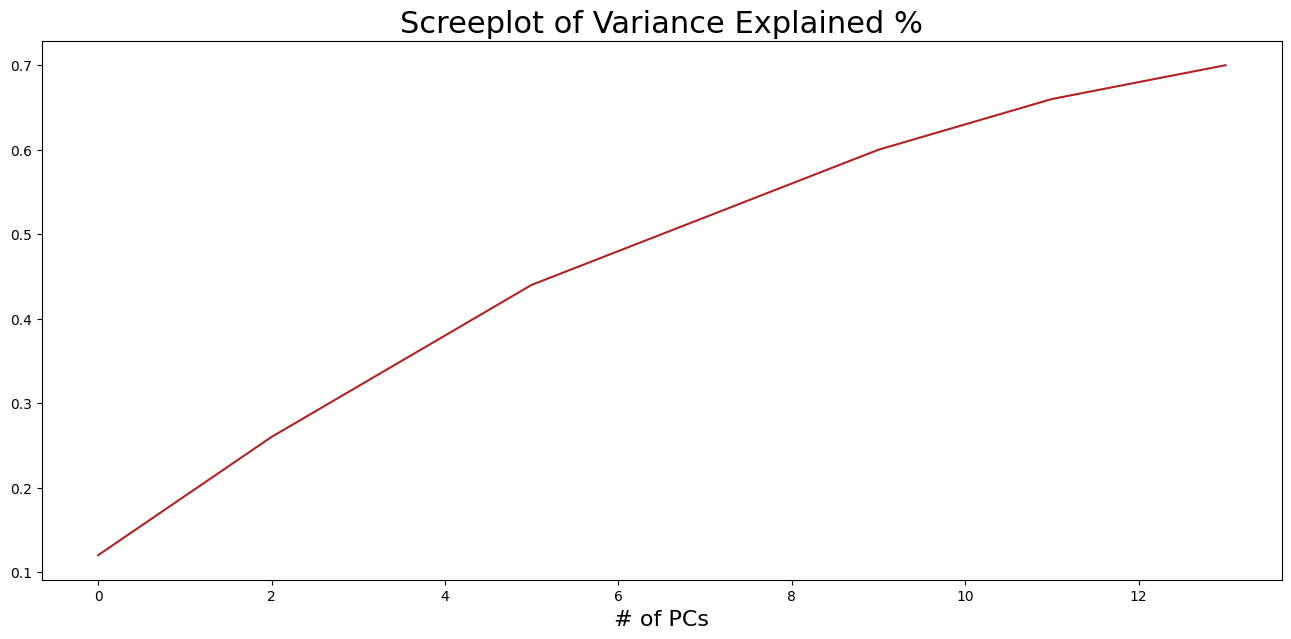

In [16]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [19]:
pca_data.head()

0         1         2         3         4         5         6   \
0 -0.604105 -0.819422  0.238892 -0.270389 -1.306637 -0.652098  0.269963   
1 -0.714525 -0.902383  0.250052 -1.253288 -1.219482 -0.490956 -0.102255   
2 -1.092104  0.733364 -0.176084 -0.145397  0.439406  0.531051 -0.949138   
3 -0.241502  0.377959 -0.447610 -0.798102 -0.194653  1.157785  0.500190   
4 -1.465296  1.043056 -1.362919  1.233223 -0.867129 -0.892260 -0.848456   

         7         8         9         10        11        12        13  
0  1.937162 -0.959585  0.485091  0.412231 -0.798066  0.259921  0.609079  
1  0.202047 -0.795530  0.009971  0.168516 -0.713585 -0.124541 -0.655854  
2 -0.673340  1.607340 -0.937639 -0.503718  0.093266  0.176403  0.145839  
3  1.339628  0.282890 -1.667356 -0.187459  0.670151 -0.314054 -0.248120  
4 -0.162949  0.943938 -0.136354  0.403345 -0.242258  0.779363  0.409992

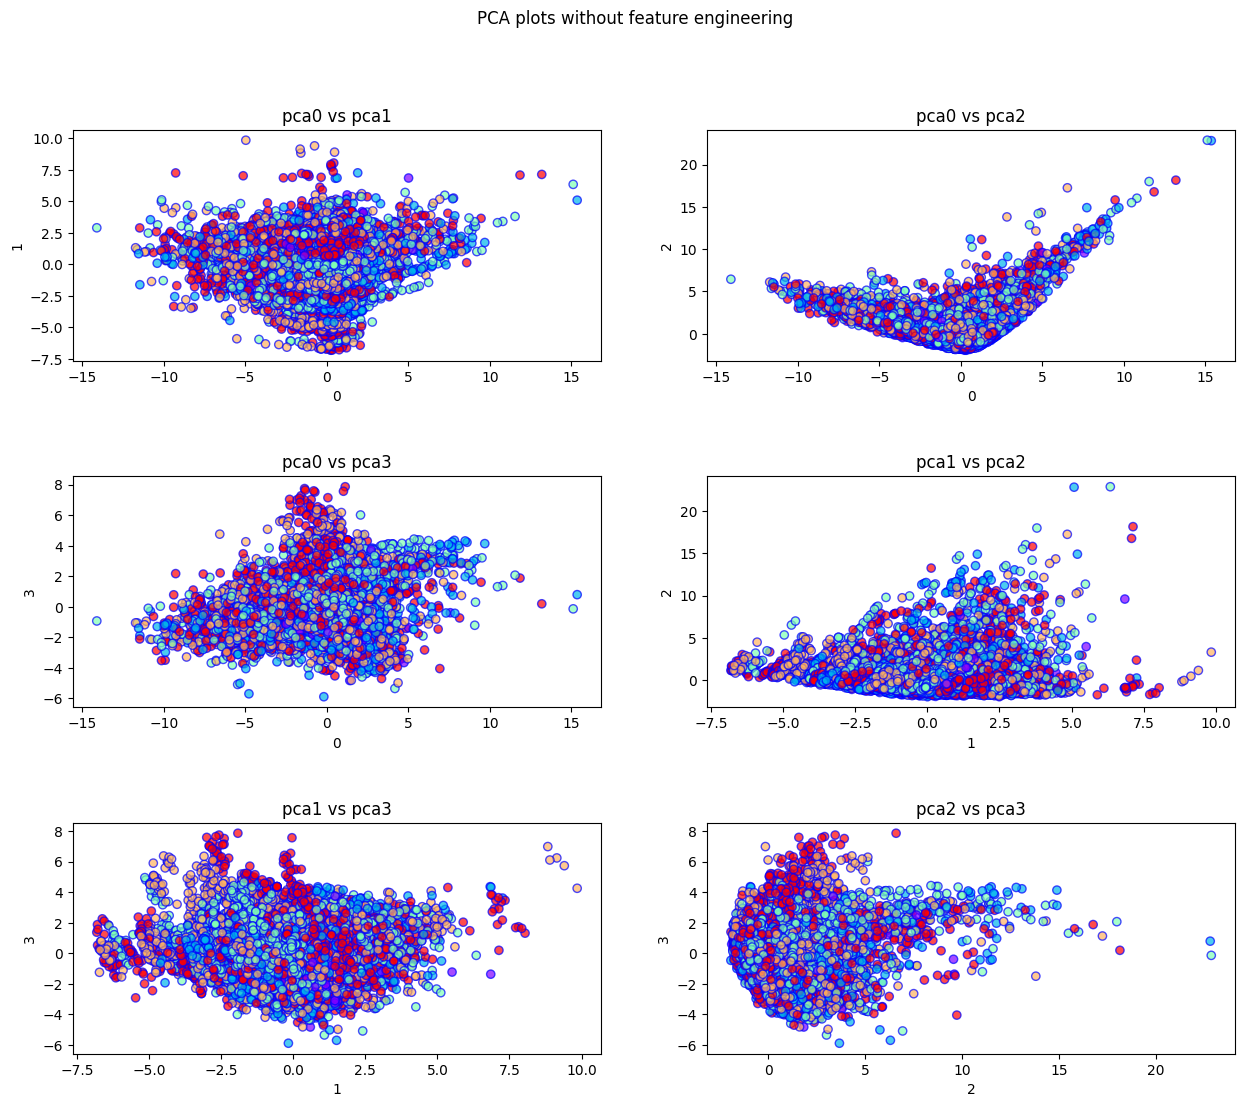

In [36]:
from itertools import combinations
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("PCA plots without feature engineering")
n=1
for col1, col2 in combinations(pca_data.columns[:4], 2):
    ax = plt.subplot(3, 2, n)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title("pca{} vs pca{}".format(col1, col2)) 
    plt.scatter(pca_data[col1], pca_data[col2],c=target, label=target.unique(),cmap='rainbow',
  alpha=0.7,edgecolors='b')
    #plt.show()
    n=n+1


2023/11/13 22:23:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4f06308a619e486bb39b17e1006e5219', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/11/13 22:23:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2023/11/13 22:36:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'http', 'https'}


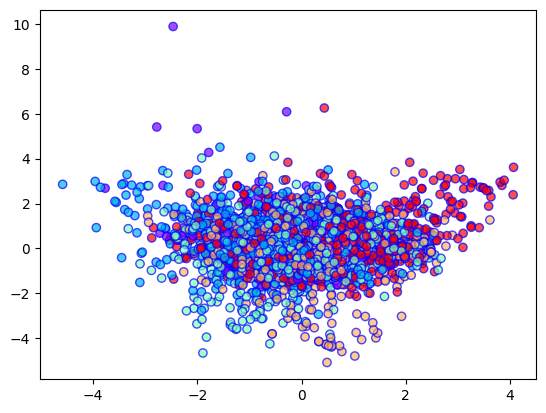

In [17]:
#LDA
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 

# divide the dataset into class and target variable
X = encoded_cat[:7000]
y = target[:7000]
 
# Preprocess the dataset and divide into train and test
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
 
# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)
 


In [44]:
import pandas as pd
all_data=pd.read_csv("../eda_features_engineering_model_antonio/preliminary_features.csv")
all_data.drop('Unnamed: 0', inplace=True, axis=1)

In [46]:
columns_to_drop=["Name","Description","RescuerID","PetID"]

In [45]:
import prince

all_data.set_index("AdoptionSpeed", inplace=True)
all_data.drop(columns_to_drop, axis=1, inplace=True)
famd = prince.FAMD(
    n_components=2,
    n_iter=30,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error" 
)
famd = famd.fit(all_data)


c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.309819937666527, -1.5759920436923156, -1.2327943296999841, -0.8651016219569416, -0.6492555855907295, -0.575609981542597, -0.4364975242341204, -0.43747863925980707, -0.3299982356834406, -0.3126526997403612, -0.24359187857939482, -0.7545600314141347, -0.1504567654076501, -0.21677042880904482, -0.19112370555136998, -0.18333812731388036, -0.18612316970832976, -0.31127839550608155, -0.1360932649166452, -0.13546173823797253, -0.11341105409720433, -0.09973296994832168, -0.06415498033091806, -0.6206255222163309, -0.06929529867268941, -0.09352115103108241, -0.0944335741111058, -0.09166906365694018, -0.1322588801568993, -0.17715372970138443, -0.08784782475886016, -0.07965730651427973, -0.0472167870555529, -0.055559842745866034, -0.034647649336344705, -0.48223041673168776, -0.05856521650590678, -0.03703989

In [47]:
famd.row_coordinates(all_data).head()

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.309819937666527, -1.5759920436923156, -1.2327943296999841, -0.8651016219569416, -0.6492555855907295, -0.575609981542597, -0.4364975242341204, -0.43747863925980707, -0.3299982356834406, -0.3126526997403612, -0.24359187857939482, -0.7545600314141347, -0.1504567654076501, -0.21677042880904482, -0.19112370555136998, -0.18333812731388036, -0.18612316970832976, -0.31127839550608155, -0.1360932649166452, -0.13546173823797253, -0.11341105409720433, -0.09973296994832168, -0.06415498033091806, -0.6206255222163309, -0.06929529867268941, -0.09352115103108241, -0.0944335741111058, -0.09166906365694018, -0.1322588801568993, -0.17715372970138443, -0.08784782475886016, -0.07965730651427973, -0.0472167870555529, -0.055559842745866034, -0.034647649336344705, -0.48223041673168776, -0.05856521650590678, -0.03703989

component             0         1
AdoptionSpeed                    
2             -3.222423 -6.946965
0             -0.127812 -0.242341
0             -0.288603 -1.027339
3              3.443610  2.904990
3              3.072067  3.257119

In [48]:
famd.column_coordinates_

component                  0         1
variable                              
Fee                 0.019870  0.005411
PhotoAmt            0.020589  0.006383
AgeScaled           0.137334  0.000307
FeeScaled           0.019870  0.005411
QuantityScaled      0.255650  0.102371
Breed1AgeFurLength  0.009941  0.000298
VDSCombination      0.084852  0.002766
TotalVisualMedia    0.019108  0.007279
SentimentScore      0.007135  0.001635
Energy              0.000173  0.002207
Contrast            0.004614  0.034452
Correlation         0.006277  0.028368
Entropy             0.000053  0.019843
Mean                0.001900  0.003623
Std_Dev             0.000203  0.007981
Age                 0.255969  0.076399
Breed1              0.280867  0.660540
Breed2              0.133699  0.355292
Color1              0.195673  0.230600
Color2              0.438614  0.305824
Color3              0.481382  0.097327
ColorCount          0.547535  0.052788
DescriptionLength   0.283646  0.362611
Dewormed            0.230805  0.023884
FurLength           0.010766  0.029496
Gender              0.342097  0.061989
Health              0.002779  0.002866
MaturitySize        0.034836  0.062250
Quantity            0.381845  0.120621
State               0.004822  0.042307
Sterilized          0.162332  0.012766
Type                0.196371  0.603984
Vaccinated          0.288313  0.022381
VideoAmt            0.004052  0.014495
num_checkpoints     0.094685  0.147187

In [49]:
famd.plot(
    all_data[:1000],
    x_component=0,
    y_component=1
)

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.1489125293076057, -1.6340134638368193, -1.2806248474865698, -0.9433981132056602, -0.7071067811865476, -0.4, -0.42426406871192845, -0.3872983346207417, -0.24494897427831783, -0.282842712474619, -0.22360679774997896, -0.8306623862918076, nan, nan, -0.17320508075688773, -0.2, -0.1, nan, nan, nan, -0.7141428428542849, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.45825756949558405, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.1414213562373095, -0.34641016151377546, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.36055512754639896, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

alt.LayerChart(...)

In [50]:
famd.column_contributions_.style.format('{:.2%}')

## Part 2: Class separability with feature engineering:



In [38]:
import pandas as pd
all_data=pd.read_csv("../eda_features_engineering_model_antonio/preliminary_features.csv")
all_data.drop('Unnamed: 0', inplace=True, axis=1)

In [39]:
all_data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'AgeScaled', 'FeeScaled', 'QuantityScaled', 'Breed1AgeFurLength',
       'VDSCombination', 'ColorCount', 'TotalVisualMedia', 'DescriptionLength',
       'SentimentScore', 'Energy', 'Contrast', 'Correlation', 'Entropy',
       'Mean', 'Std_Dev', 'num_checkpoints'],
      dtype='object')

In [40]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mlflow import MlflowClient
import mlflow

#mlflow.autolog() 
# Create a dummy dataframe with both categorical and numerical columns

columns_to_drop=["Name","Description","RescuerID","PetID"]
categorical_columns=["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State"]
numerical_columns=['SentimentScore', 'Energy', 'Contrast', 'Correlation',
       'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints','PhotoAmt','VideoAmt',"Age","Quantity","Fee"]

target=all_data["AdoptionSpeed"]
all_data=all_data.drop("AdoptionSpeed", axis=1)



#simple filling
all_data[categorical_columns] = all_data[categorical_columns].fillna("unknown")
all_data.fillna(all_data[numerical_columns].median(), inplace=True)
#all_data=all_data.fillna(0)

#transformation
all_data[categorical_columns]=all_data[categorical_columns].astype(str)
all_data[numerical_columns]=all_data[numerical_columns].astype(float)

all_data=all_data.drop(columns_to_drop, axis=1)

#normalize numerical columns:

for column in numerical_columns:
  all_data[numerical_columns] = (all_data[numerical_columns] - all_data[numerical_columns].mean()) / all_data[numerical_columns].std()


# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(all_data[categorical_columns])
encoded_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical columns and the numerical columns
X = pd.concat([encoded_cat, all_data[numerical_columns]], axis=1)

# Perform PCA on the combined data
pca = PCA(n_components=14, )
pca_data = pca.fit_transform(X)

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
pca_data = pd.DataFrame(pca_data)
print(pca.explained_variance_ratio_)

print(pca.components_)


[0.12700283 0.0818032  0.07040398 0.06507747 0.06149999 0.05020558
 0.04831891 0.04573532 0.04447701 0.03910358 0.03444914 0.02781851
 0.02519955 0.02393505]
[[-7.37783820e-02  7.37783820e-02 -4.39376537e-05 ... -3.15647065e-02
  -2.04131413e-02  6.60323066e-03]
 [ 6.94772235e-02 -6.94772235e-02  3.18650188e-05 ...  4.42597192e-01
  -5.28241593e-01  2.19803654e-01]
 [ 3.59068602e-02 -3.59068602e-02  9.08037450e-05 ... -4.37579146e-02
   1.63768712e-01  2.55360511e-04]
 ...
 [ 6.38560013e-02 -6.38560013e-02 -3.61600669e-05 ... -9.54158160e-02
   3.62475964e-02  3.09451250e-02]
 [ 7.90384120e-02 -7.90384120e-02  1.78438327e-05 ...  2.70344342e-01
  -9.83569216e-02  3.17851199e-02]
 [ 2.11736873e-02 -2.11736873e-02 -1.55402740e-04 ... -1.38752784e-02
   2.85344564e-01  5.94222183e-02]]


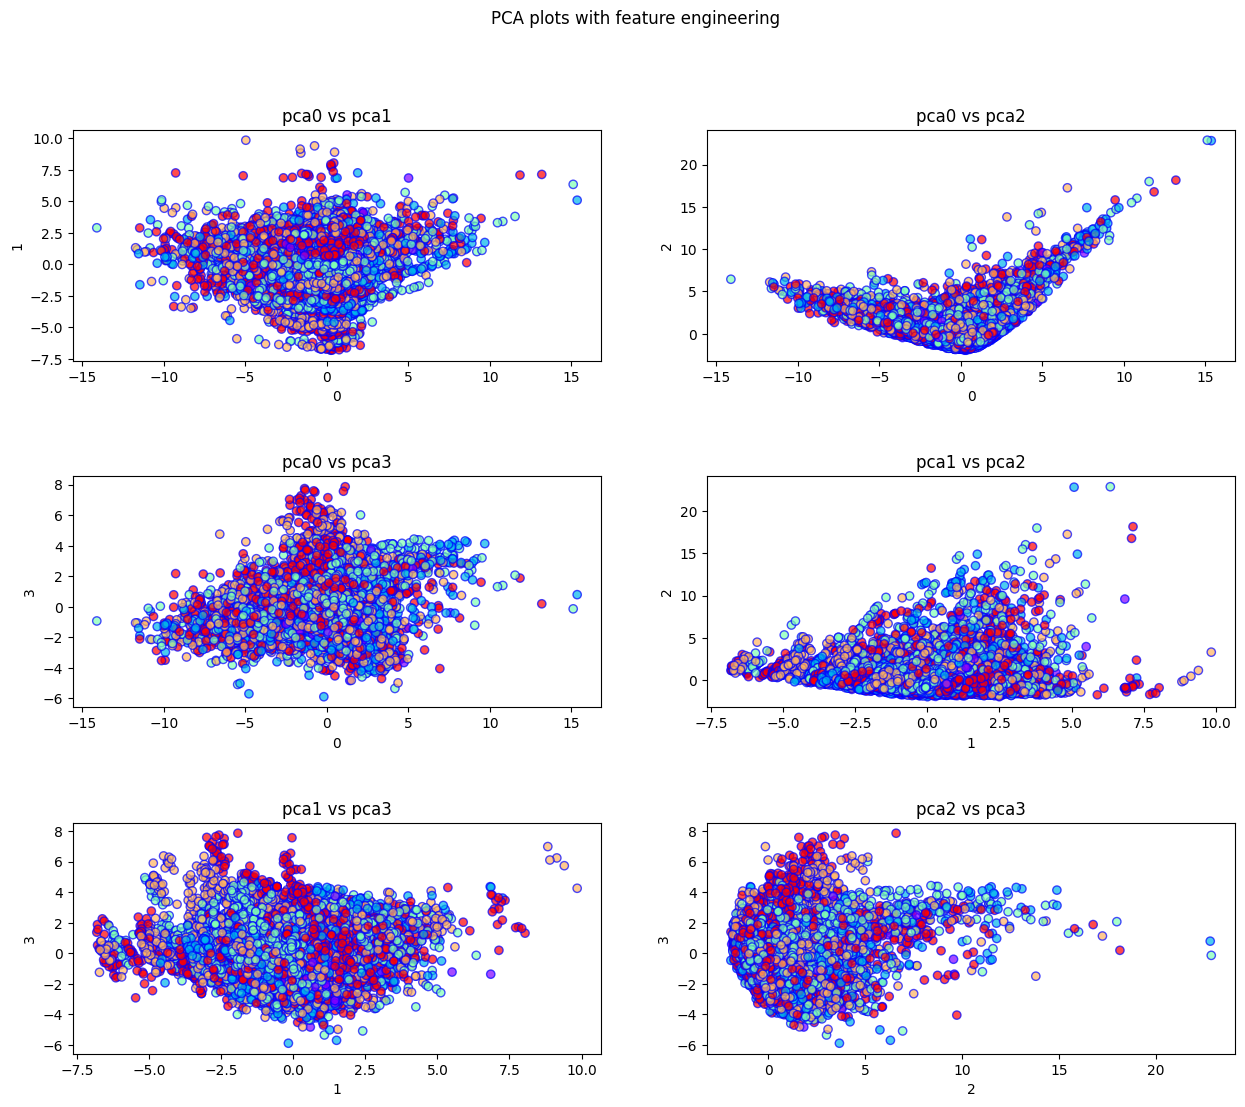

In [42]:
from itertools import combinations
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("PCA plots with feature engineering")
n=1
for col1, col2 in combinations(pca_data.columns[:4], 2):
    ax = plt.subplot(3, 2, n)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title("pca{} vs pca{}".format(col1, col2)) 
    plt.scatter(pca_data[col1], pca_data[col2],c=target, label=target.unique(),cmap='rainbow',
  alpha=0.7,edgecolors='b')
    #plt.show()
    n=n+1


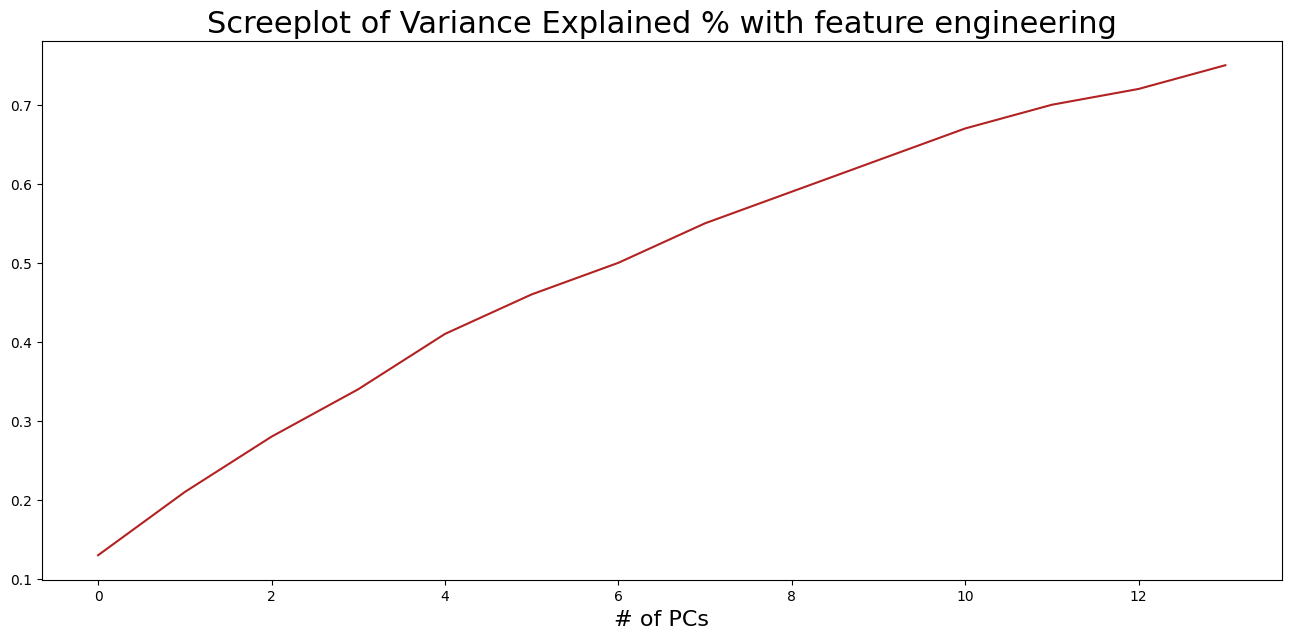

In [43]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained % with feature engineering', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()